In [1]:
import pandas as pd # Data preprocessing
import numpy as np #linear algebra
import missingno #erroneous data detection
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
from sklearn.model_selection import train_test_split,KFold 
#Kfold : KFold is a cross-validation method used to evaluate the performance 
#of a machine learning model. This method divides the dataset into training 
#and test subsets and evaluates the overall performance of the model by making 
#multiple training-test partitions.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from xgboost import XGBClassifier kodu, XGBoost kütüphanesinden 
#XGBClassifier sınıfını içe aktarır. XGBoost, Gradient Boosting 
#yöntemini kullanarak yüksek performanslı ve 
#ölçeklenebilir bir makine öğrenmesi modeli sağlayan popüler bir kütüphanedir.

#XGBClassifier, XGBoost algoritmasını kullanarak sınıflandırma problemleri 
#için bir sınıflandırıcı modeli oluşturmanızı sağlar. 
#XGBoost, ağaç tabanlı bir yöntemdir ve birden fazla karar ağacını 
#birleştirerek güçlü bir tahmin modeli oluşturur. Bu sınıflandırıcı, 
#doğrusal olmayan ilişkileri öğrenmek 
#ve veri kümesindeki özelliklerin etkisini yakalamak için kullanılabilir.

In [3]:
#örnek : 
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri kümesini yükle
iris = load_iris()
X = iris.data
y = iris.target

# Eğitim ve test veri kümelerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost sınıflandırıcı modelini oluştur
model = XGBClassifier()

# Modeli eğit
model.fit(X_train, y_train)

# Test veri kümesi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Doğruluk değerini hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 1.0


In [4]:
#Let's import our data
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [5]:
#we need more information about our data : 
df_train.shape , df_test.shape

((8693, 14), (4277, 13))

In [6]:
#the missing dataset contains our target variable
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [8]:
#'Transported' is my target variable
#the model we built will predict the "Transported" data

In [9]:
df_train.head(7).T

0             1              2             3  \
PassengerId           0001_01       0002_01        0003_01       0003_02   
HomePlanet             Europa         Earth         Europa        Europa   
CryoSleep               False         False          False         False   
Cabin                   B/0/P         F/0/S          A/0/S         A/0/S   
Destination       TRAPPIST-1e   TRAPPIST-1e    TRAPPIST-1e   TRAPPIST-1e   
Age                      39.0          24.0           58.0          33.0   
VIP                     False         False           True         False   
RoomService               0.0         109.0           43.0           0.0   
FoodCourt                 0.0           9.0         3576.0        1283.0   
ShoppingMall              0.0          25.0            0.0         371.0   
Spa                       0.0         549.0         6715.0        3329.0   
VRDeck                    0.0          44.0           49.0         193.0   
Name          Maham Ofracculy  Juanna Vines  Altark Susent  Solam Susent   
Transported             False          True          False         False   

                              4                  5                   6  
PassengerId             0004_01            0005_01             0006_01  
HomePlanet                Earth              Earth               Earth  
CryoSleep                 False              False               False  
Cabin                     F/1/S              F/0/P               F/2/S  
Destination         TRAPPIST-1e      PSO J318.5-22         TRAPPIST-1e  
Age                        16.0               44.0                26.0  
VIP                       False              False               False  
RoomService               303.0                0.0                42.0  
FoodCourt                  70.0              483.0              1539.0  
ShoppingMall              151.0                0.0                 3.0  
Spa                       565.0              291.0                 0.0  
VRDeck                      2.0                0.0                 0.0  
Name          Willy Santantines  Sandie Hinetthews  Billex Jacostaffey  
Transported                True               True                True

In [10]:
df_test.head(7).T

0               1                2  \
PassengerId           0013_01         0018_01          0019_01   
HomePlanet              Earth           Earth           Europa   
CryoSleep                True           False             True   
Cabin                   G/3/S           F/4/S            C/0/S   
Destination       TRAPPIST-1e     TRAPPIST-1e      55 Cancri e   
Age                      27.0            19.0             31.0   
VIP                     False           False            False   
RoomService               0.0             0.0              0.0   
FoodCourt                 0.0             9.0              0.0   
ShoppingMall              0.0             0.0              0.0   
Spa                       0.0          2823.0              0.0   
VRDeck                    0.0             0.0              0.0   
Name          Nelly Carsoning  Lerome Peckers  Sabih Unhearfus   

                             3                4             5                6  
PassengerId            0021_01          0023_01       0027_01          0029_01  
HomePlanet              Europa            Earth         Earth           Europa  
CryoSleep                False            False         False             True  
Cabin                    C/1/S            F/5/S         F/7/P            B/2/P  
Destination        TRAPPIST-1e      TRAPPIST-1e   TRAPPIST-1e      55 Cancri e  
Age                       38.0             20.0          31.0             21.0  
VIP                      False            False         False            False  
RoomService                0.0             10.0           0.0              0.0  
FoodCourt               6652.0              0.0        1615.0              NaN  
ShoppingMall               0.0            635.0         263.0              0.0  
Spa                      181.0              0.0         113.0              0.0  
VRDeck                   585.0              0.0          60.0              0.0  
Name          Meratz Caltilter  Brence Harperez  Karlen Ricks  Aldah Ainserfle

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

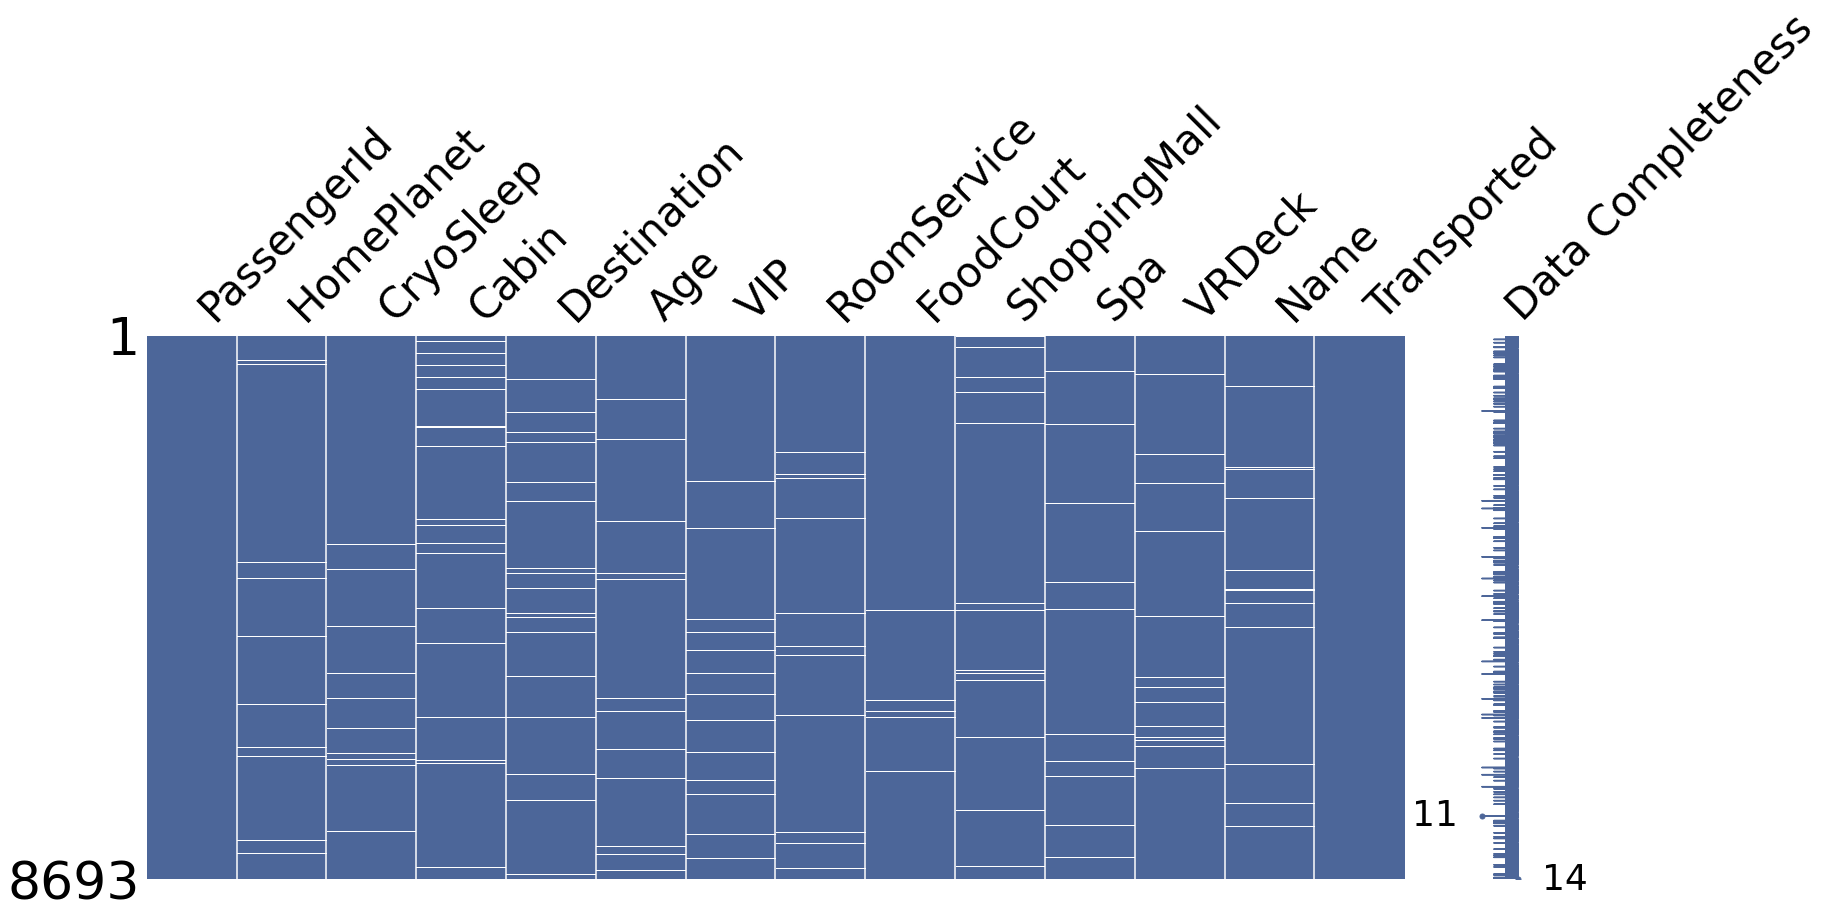

In [12]:
missingno.matrix(df_train,color=(0.3, 0.4, 0.6),fontsize=42,labels=True)
#missingno library is very useful for detecting and visualizing missing data

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<AxesSubplot:>

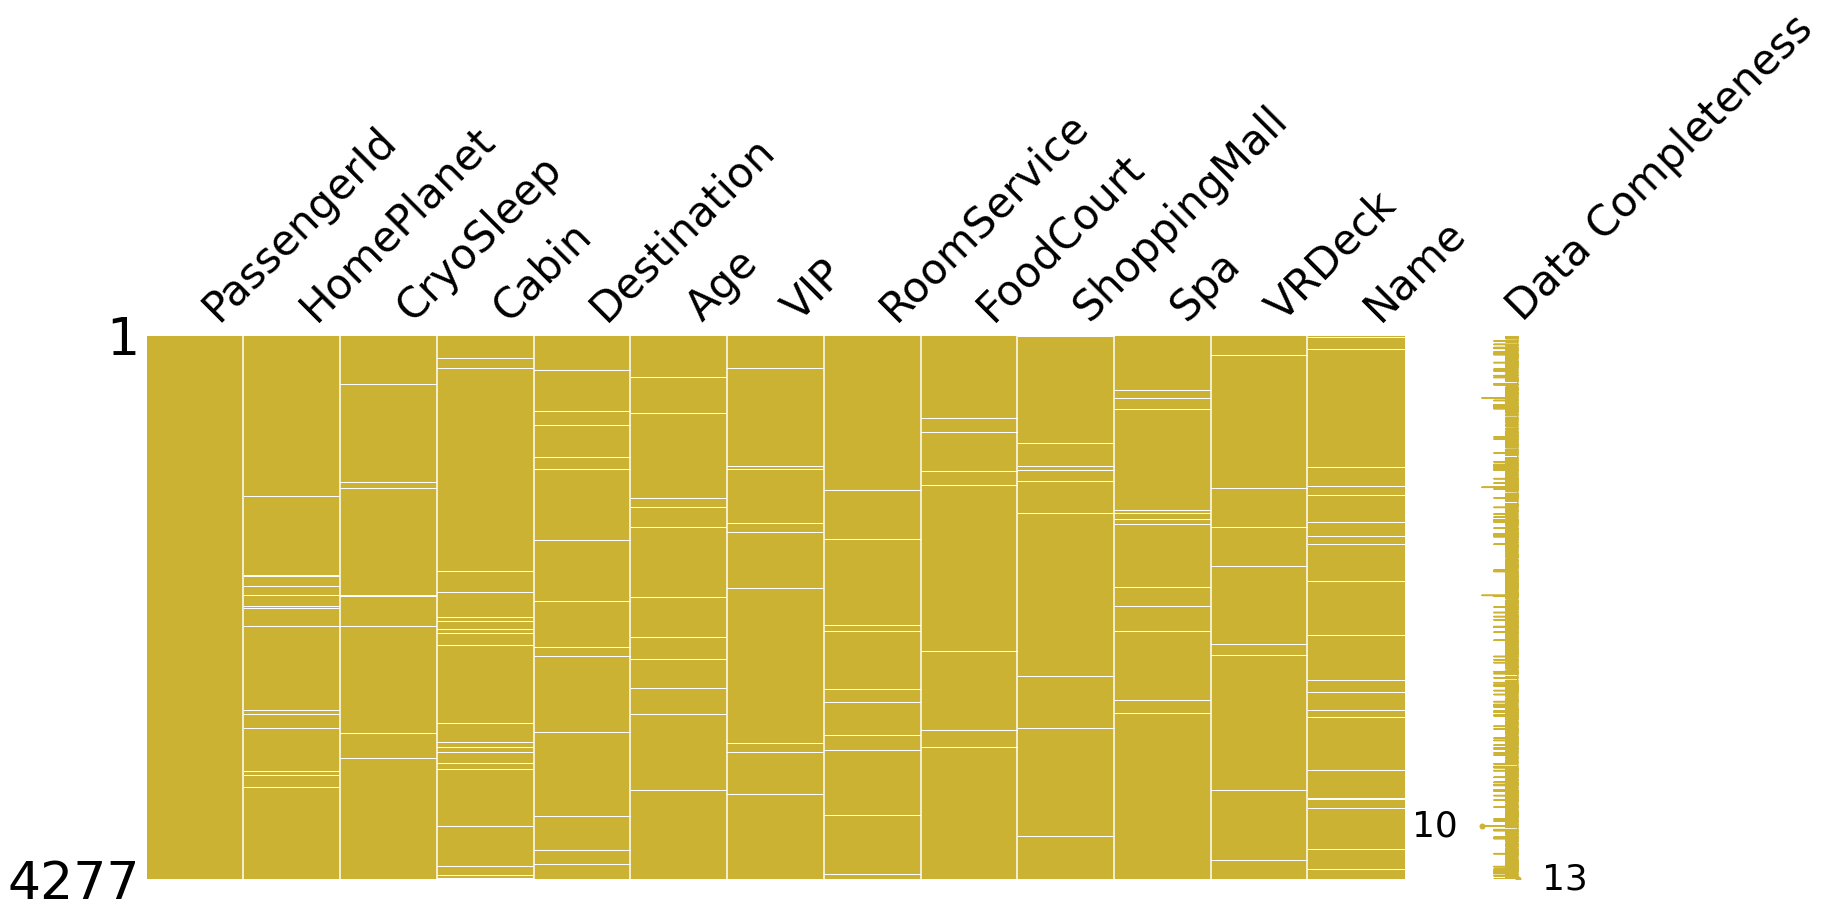

In [14]:
missingno.matrix(df_test,color=(0.8, 0.7, 0.2),fontsize=42,labels=True)

In [15]:
#As can be seen, there are missing data in both test data and training data.
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
cols_with_null=df_train.isnull().sum().sort_values(ascending=False)
cols_with_null.head(10)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
dtype: int64

In [17]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [18]:
cols_with_null=df_test.isnull().sum().sort_values(ascending=False)
cols_with_null.head(10)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
dtype: int64

In [19]:
df_train.describe().T

count        mean          std  min   25%   50%   75%      max
Age           8514.0   28.827930    14.489021  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  224.687617   666.717663  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.077203  1611.489240  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  173.729169   604.696458  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.138778  1136.705535  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  304.854791  1145.717189  0.0   0.0   0.0  46.0  24133.0

In [20]:
#Let's classify the different types of data we have
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [21]:
df_train.drop(['PassengerId','Name'],axis=1)
#we delete data that does not help us

HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P    55 Cancri e  41.0   True          0.0   
8689      Earth      True  G/1499/S  PSO J318.5-22  18.0  False          0.0   
8690      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False          0.0   
8691     Europa     False   E/608/S    55 Cancri e  32.0  False          0.0   
8692     Europa     False   E/608/S    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0           0.0           0.0     0.0     0.0        False  
1           9.0          25.0   549.0    44.0         True  
2        3576.0           0.0  6715.0    49.0        False  
3        1283.0         371.0  3329.0   193.0        False  
4          70.0         151.0   565.0     2.0         True  
...         ...           ...     ...     ...          ...  
8688     6819.0           0.0  1643.0    74.0        False  
8689        0.0           0.0     0.0     0.0        False  
8690        0.0        1872.0     1.0     0.0         True  
8691     1049.0           0.0   353.0  3235.0        False  
8692     4688.0           0.0     0.0    12.0         True  

[8693 rows x 12 columns]

In [22]:
df_test.drop(['PassengerId','Name'],axis=1)

HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0         Earth      True     G/3/S    TRAPPIST-1e  27.0  False          0.0   
1         Earth     False     F/4/S    TRAPPIST-1e  19.0  False          0.0   
2        Europa      True     C/0/S    55 Cancri e  31.0  False          0.0   
3        Europa     False     C/1/S    TRAPPIST-1e  38.0  False          0.0   
4         Earth     False     F/5/S    TRAPPIST-1e  20.0  False         10.0   
...         ...       ...       ...            ...   ...    ...          ...   
4272      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False          0.0   
4273      Earth     False       NaN    TRAPPIST-1e  42.0  False          0.0   
4274       Mars      True   D/296/P    55 Cancri e   NaN  False          0.0   
4275     Europa     False   D/297/P            NaN   NaN  False          0.0   
4276      Earth      True  G/1498/S  PSO J318.5-22  43.0  False          0.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1           9.0           0.0  2823.0     0.0  
2           0.0           0.0     0.0     0.0  
3        6652.0           0.0   181.0   585.0  
4           0.0         635.0     0.0     0.0  
...         ...           ...     ...     ...  
4272        0.0           0.0     0.0     0.0  
4273      847.0          17.0    10.0   144.0  
4274        0.0           0.0     0.0     0.0  
4275     2680.0           0.0     0.0   523.0  
4276        0.0           0.0     0.0     0.0  

[4277 rows x 11 columns]

In [23]:
object_cols=['HomePlanet', 'CryoSleep', 
             'Cabin', 'Destination', 'VIP', 
             'Transported']

<AxesSubplot:>

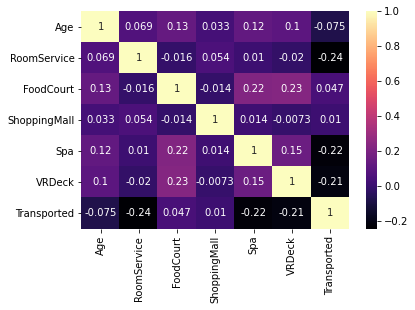

In [24]:
sns.heatmap(data=df_train.corr(),annot=True,cmap="magma")
#pay attention to the weights

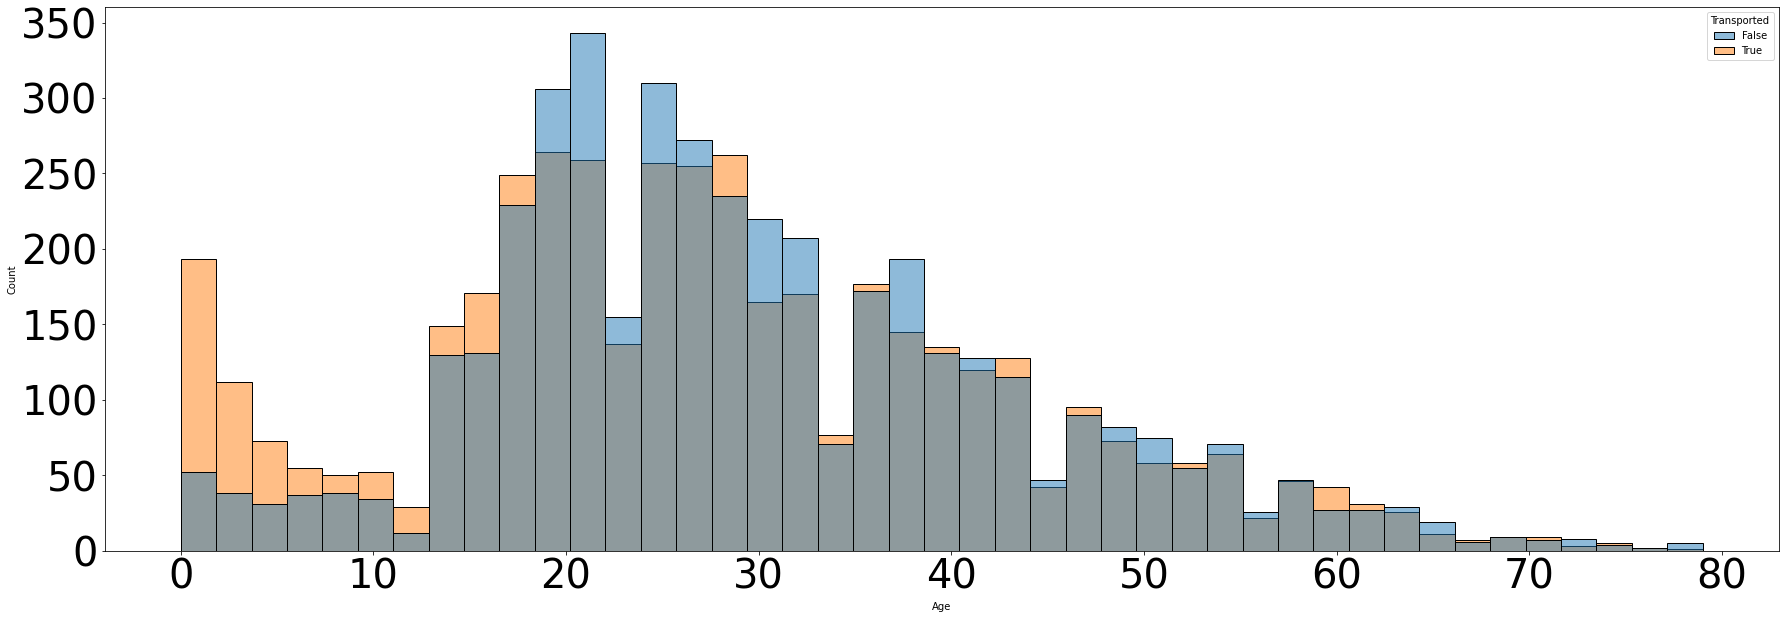

In [25]:
plt.figure(figsize=(30,10))
sns.histplot(x='Age',hue='Transported',data=df_train,)
plt.xticks(fontsize=40)  # set the size of the x-axis labels
plt.yticks(fontsize=40)  # set the size of the y-axis labels
plt.show()

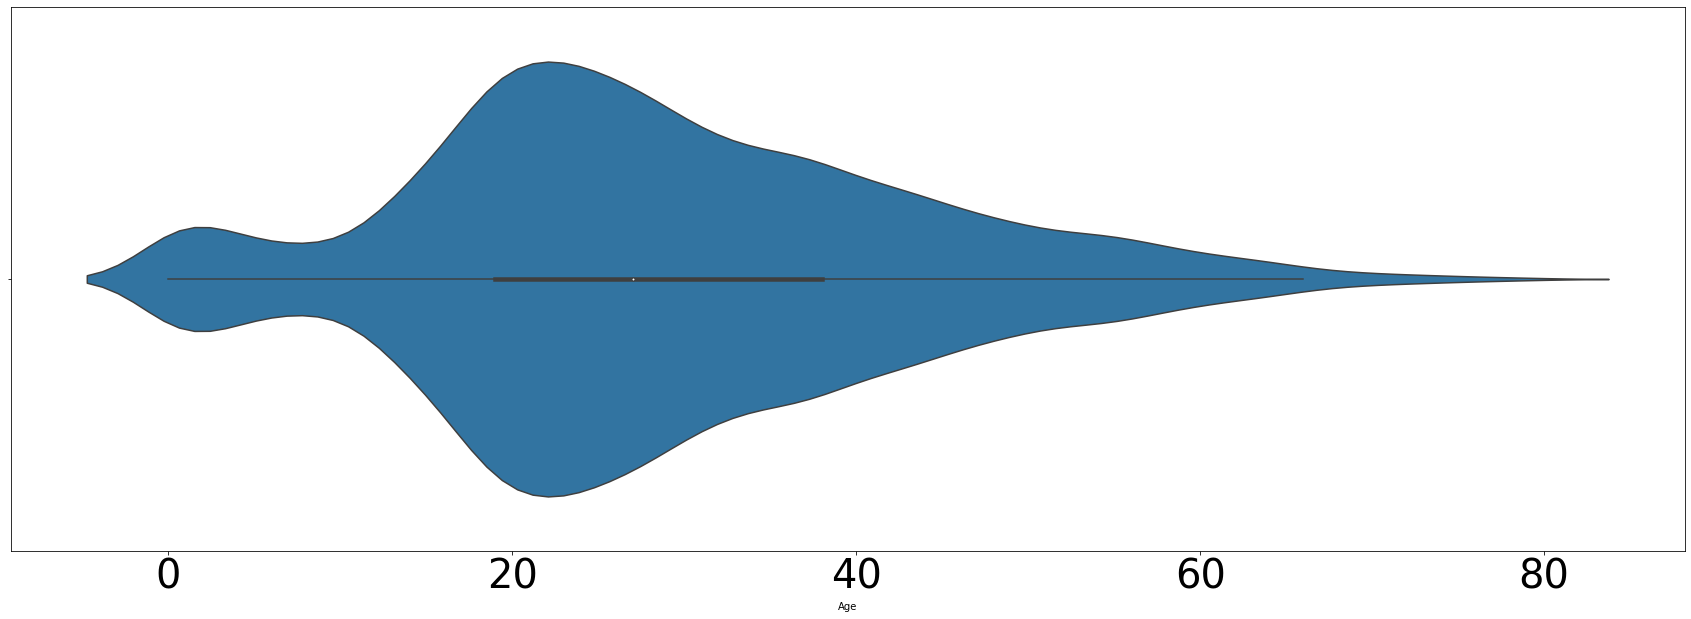

In [26]:
plt.figure(figsize=(30,10))
sns.violinplot(x='Age',hue='Transported',data=df_train)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='count'>

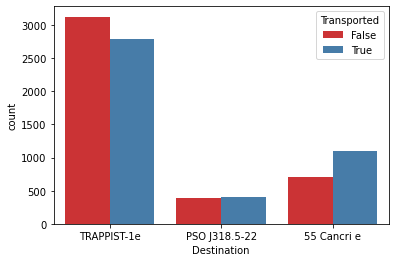

In [27]:
sns.countplot(data = df_train, x = 'Destination', hue = 'Transported', palette = 'Set1')

<AxesSubplot:xlabel='VIP', ylabel='count'>

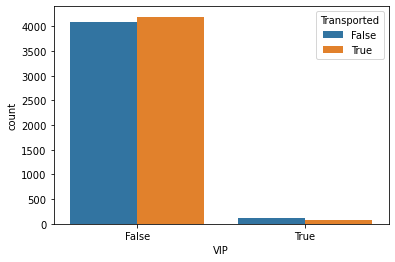

In [28]:
sns.countplot(x='VIP',hue='Transported',data=df_train)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

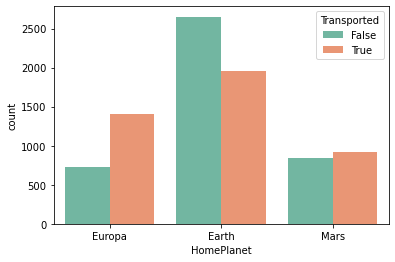

In [29]:
sns.countplot(x='HomePlanet',hue='Transported',data=df_train,palette='Set2')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

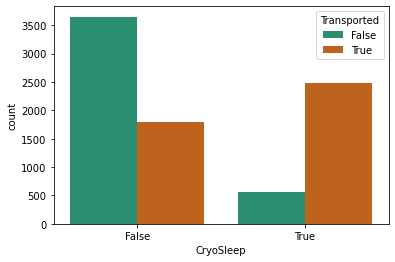

In [30]:
sns.countplot(x='CryoSleep',hue='Transported',data=df_train,palette='Dark2')

In [31]:
df_train[object_cols].groupby(by='Destination').count()

HomePlanet  CryoSleep  Cabin   VIP  Transported
Destination                                                   
55 Cancri e          1769       1756   1750  1757         1800
PSO J318.5-22         780        777    778   774          796
TRAPPIST-1e          5765       5765   5788  5781         5915

In [32]:
df_train[object_cols].groupby(by='Destination').mean()

Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175

In [33]:
df_train[object_cols].groupby(by='VIP').count()

HomePlanet  CryoSleep  Cabin  Destination  Transported
VIP                                                          
False        8098       8084   8104         8115         8291
True          194        196    193          197          199

In [34]:
df_train[object_cols].groupby(by='VIP').mean()

Transported
VIP               
False     0.506332
True      0.381910

In [35]:
df_train[object_cols].groupby(by='HomePlanet').count()

CryoSleep  Cabin  Destination   VIP  Transported
HomePlanet                                                  
Earth            4488   4507         4503  4487         4602
Europa           2073   2070         2094  2089         2131
Mars             1716   1722         1717  1716         1759

In [36]:
df_train[object_cols].groupby(by='HomePlanet').mean()

Transported
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024

In [37]:
df_train[object_cols].groupby(by='CryoSleep').count()

HomePlanet  Cabin  Destination   VIP  Transported
CryoSleep                                                   
False            5315   5331         5309  5318         5439
True             2962   2953         2989  2962         3037

In [38]:
df_train[object_cols].groupby(by='CryoSleep').mean()

Transported
CryoSleep             
False         0.328921
True          0.817583

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

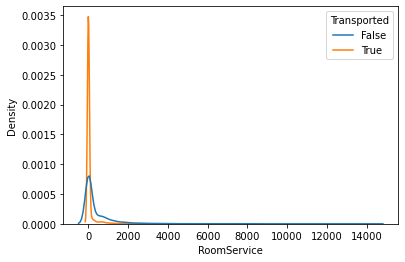

In [39]:
sns.kdeplot(data=df_train, x='RoomService', hue='Transported') 

<AxesSubplot:xlabel='RoomService', ylabel='ShoppingMall'>

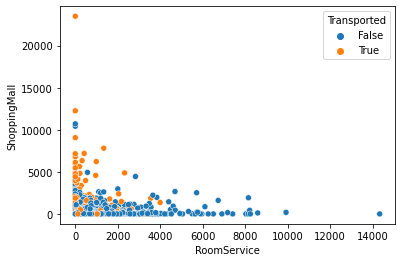

In [40]:
sns.scatterplot(data=df_train,x='RoomService', y='ShoppingMall', hue='Transported')

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

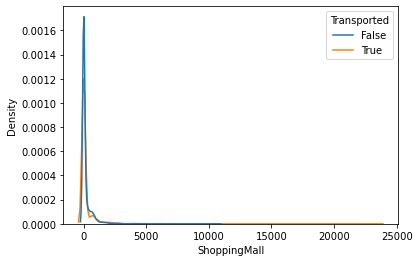

In [41]:
sns.kdeplot(data=df_train, x='ShoppingMall', hue='Transported') 

<AxesSubplot:xlabel='RoomService', ylabel='VRDeck'>

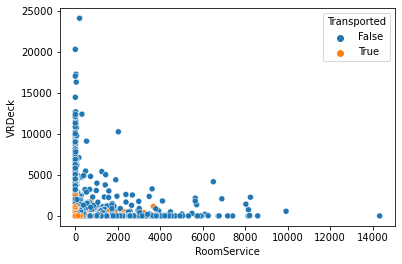

In [42]:
sns.scatterplot(data=df_train,x='RoomService', y='VRDeck', hue='Transported')

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

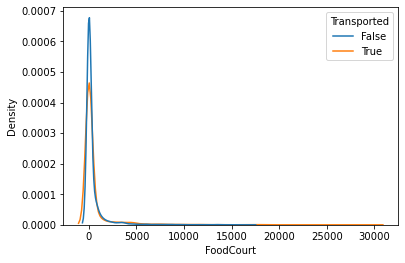

In [43]:
sns.kdeplot(data=df_train, x='FoodCourt', hue='Transported') 

<AxesSubplot:xlabel='Spa', ylabel='Density'>

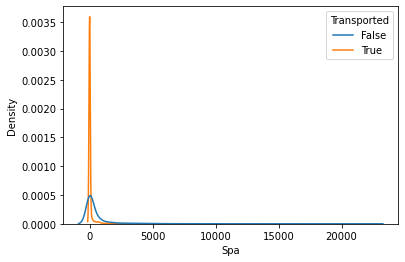

In [44]:
sns.kdeplot(data=df_train, x='Spa', hue='Transported') 

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

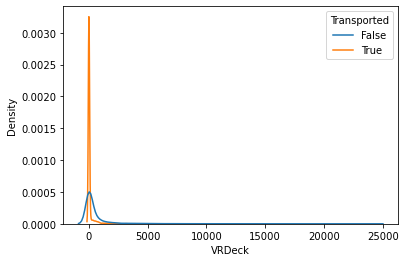

In [45]:
sns.kdeplot(data=df_train, x='VRDeck', hue='Transported') 

<AxesSubplot:xlabel='ShoppingMall', ylabel='FoodCourt'>

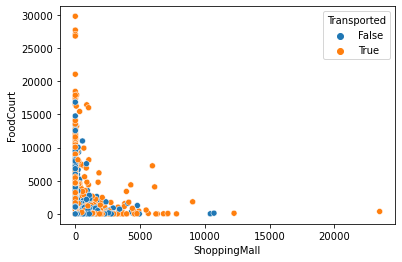

In [46]:
sns.scatterplot(data=df_train,x='ShoppingMall', y='FoodCourt', hue='Transported')

In [47]:
df_train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [48]:
df_train.shape , df_test.shape

((8693, 14), (4277, 13))

In [49]:
#Makine öğrenmesinde eğitim ve test verilerini birleştirmek, 
#genellikle modelin eğitimi ve performans değerlendirmesi 
#için veri kümesinin doğru bir şekilde kullanılmasını sağlamak amacıyla yapılır.

In [50]:
#Makine öğrenmesinde eğitim ve test verilerini birleştirmek, genellikle modelin eğitimi ve performans değerlendirmesi için veri kümesinin doğru bir şekilde kullanılmasını sağlamak amacıyla yapılır. İşte bunun nedenleri:

#eri Bütünlüğü: Eğitim ve test verilerini birleştirerek, veri bütünlüğünü sağlamak mümkündür. Bu sayede, veri kümesindeki tüm örnekler modelin eğitimine ve testine dahil edilebilir. Böylece, veri setinin tamamı üzerinde daha kapsayıcı bir model elde edilebilir.

#Önişleme ve Öznitelik Mühendisliği: Veri kümesi üzerinde gerçekleştirilen önişleme ve öznitelik mühendisliği adımları genellikle eğitim ve test verileri üzerinde uygulanır. Verileri birleştirerek bu adımların tek bir veri kümesi üzerinde tutarlı bir şekilde gerçekleştirilmesi sağlanır. Böylece, eğitim ve test verilerinin ayrı ayrı önişleme ve öznitelik mühendisliği adımlarından geçmesi önlenir.

#Model Seçimi ve Ayarlaması: Veri kümesini birleştirerek, model seçimi ve model ayarlaması adımlarında daha geniş bir veri kümesi kullanılabilir. Bu, modelin daha iyi bir genelleme performansı elde etmesine yardımcı olabilir.

#Kross Doğrulama (Cross-Validation): Kross doğrulama, modelin performansını değerlendirmek için kullanılan bir yöntemdir. Eğitim veri setini daha küçük parçalara böler ve her bir parçada modeli eğitip diğer parçalarda değerlendirerek performans ölçümleri yapar. Bu yöntemde, veri kümesinin birleştirilerek kullanılması, kross doğrulama sürecinin daha tutarlı ve güvenilir olmasını sağlar.

#Bu nedenlerle, eğitim ve test verilerinin birleştirilmesi, veri kümesinin daha iyi kullanılmasını sağlar, önişleme adımlarının tutarlılığını korur ve modelin performansının doğru bir şekilde değerlendirilmesini sağlar.

In [51]:
df_data=pd.concat([df_train,df_test],axis=0)

In [52]:
#This can be used to re-index the dataframe or to fix problems with indexes.
df_data= pd.concat([df_data.loc[:]]).reset_index(drop=True)

In [53]:
df_data.head(7)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4        303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True  
5        True  
6        True

In [54]:
df_data['Transported'].mode() 
# I want to see the most frequently repeated values

0    True
dtype: object

In [55]:
df_data.describe().T

count        mean          std  min   25%   50%   75%      max
Age           12700.0   28.771969    14.387261  0.0  19.0  27.0  38.0     79.0
RoomService   12707.0  222.897852   647.596664  0.0   0.0   0.0  49.0  14327.0
FoodCourt     12681.0  451.961675  1584.370747  0.0   0.0   0.0  77.0  29813.0
ShoppingMall  12664.0  174.906033   590.558690  0.0   0.0   0.0  29.0  23492.0
Spa           12686.0  308.476904  1130.279641  0.0   0.0   0.0  57.0  22408.0
VRDeck        12702.0  306.789482  1180.097223  0.0   0.0   0.0  42.0  24133.0

<AxesSubplot:>

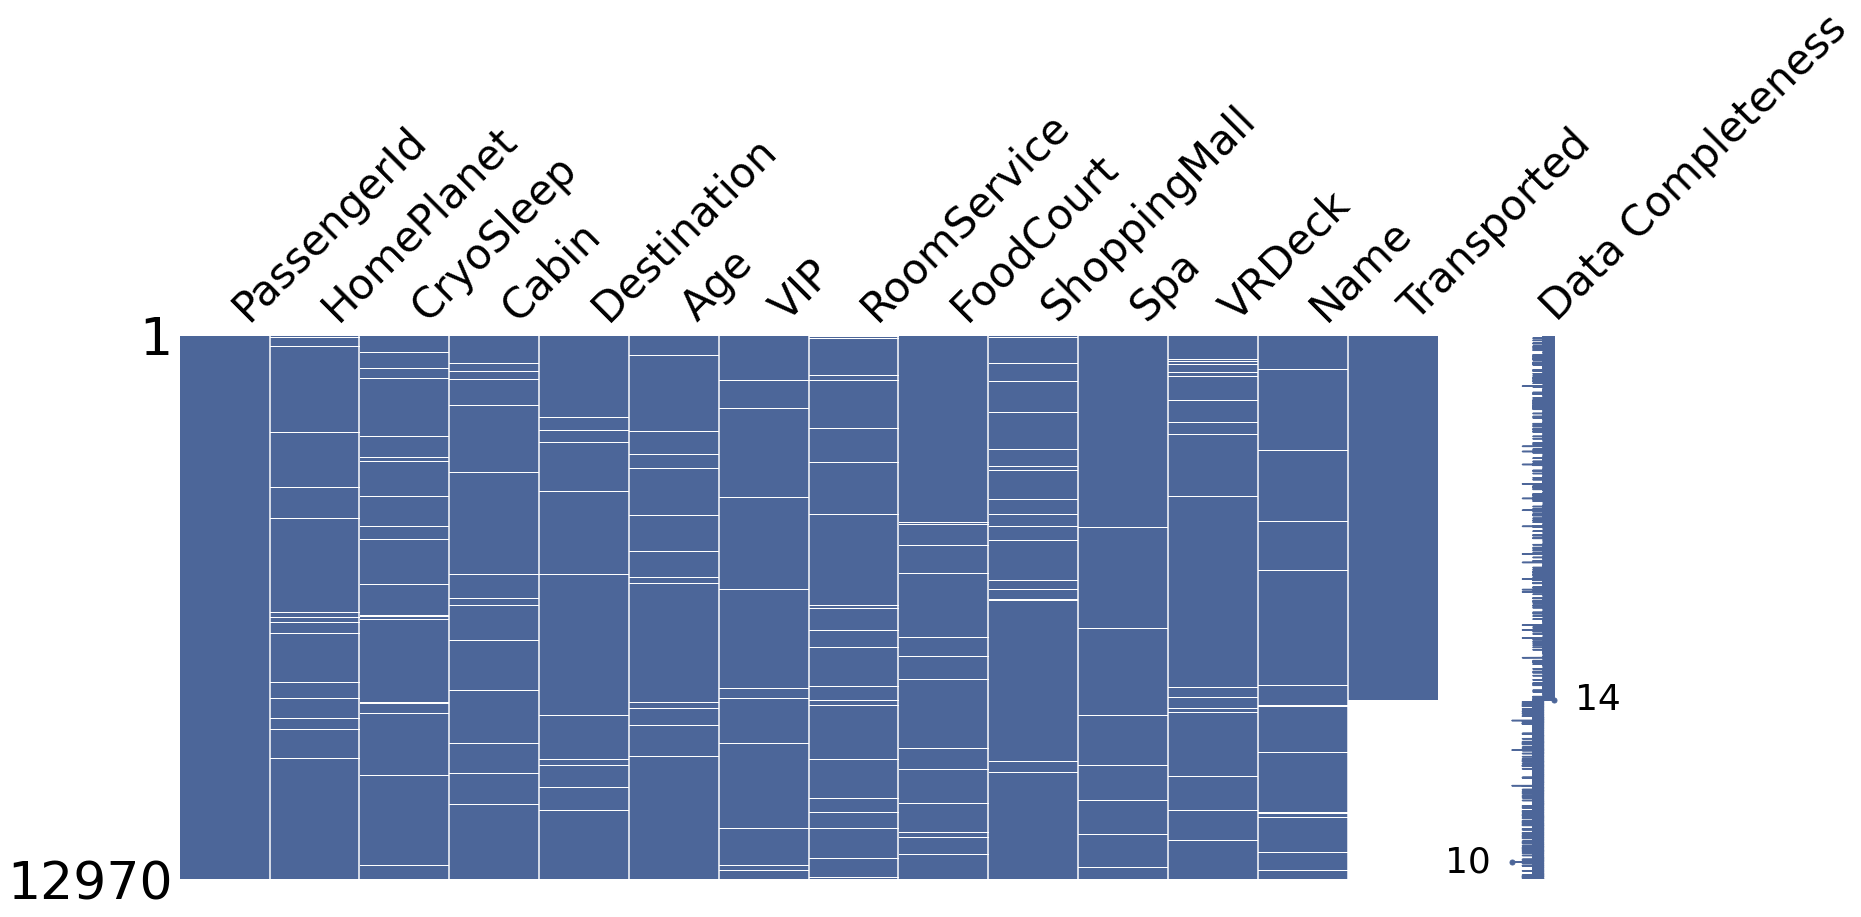

In [56]:
missingno.matrix(df_data,color=(0.3, 0.4, 0.6),fontsize=42,labels=True)

In [57]:
df_data['Age'].fillna(df_data['Age'].mean(), inplace=True)
df_data['VIP'].fillna('False', inplace=True)
df_data['RoomService'].fillna(df_data['RoomService'].mean(), inplace=True)
df_data['FoodCourt'].fillna(df_data['FoodCourt'].mean(), inplace=True)
df_data['Spa'].fillna(df_data['Spa'].mean(), inplace=True)
df_data['VRDeck'].fillna(df_data['VRDeck'].mean(), inplace=True)
df_data['Transported'].fillna('None', inplace=True)
df_data['ShoppingMall'].fillna(df_data['ShoppingMall'].mean(), inplace=True)
df_data['Destination'].fillna('Unknown',inplace=True)
df_data['Cabin'].fillna('0', inplace=True)
df_data['HomePlanet'].fillna('Unknown',inplace=True)
df_data['CryoSleep'].fillna('False',inplace=True)
df_data['Name'].fillna('Unknown', inplace=True)

<AxesSubplot:>

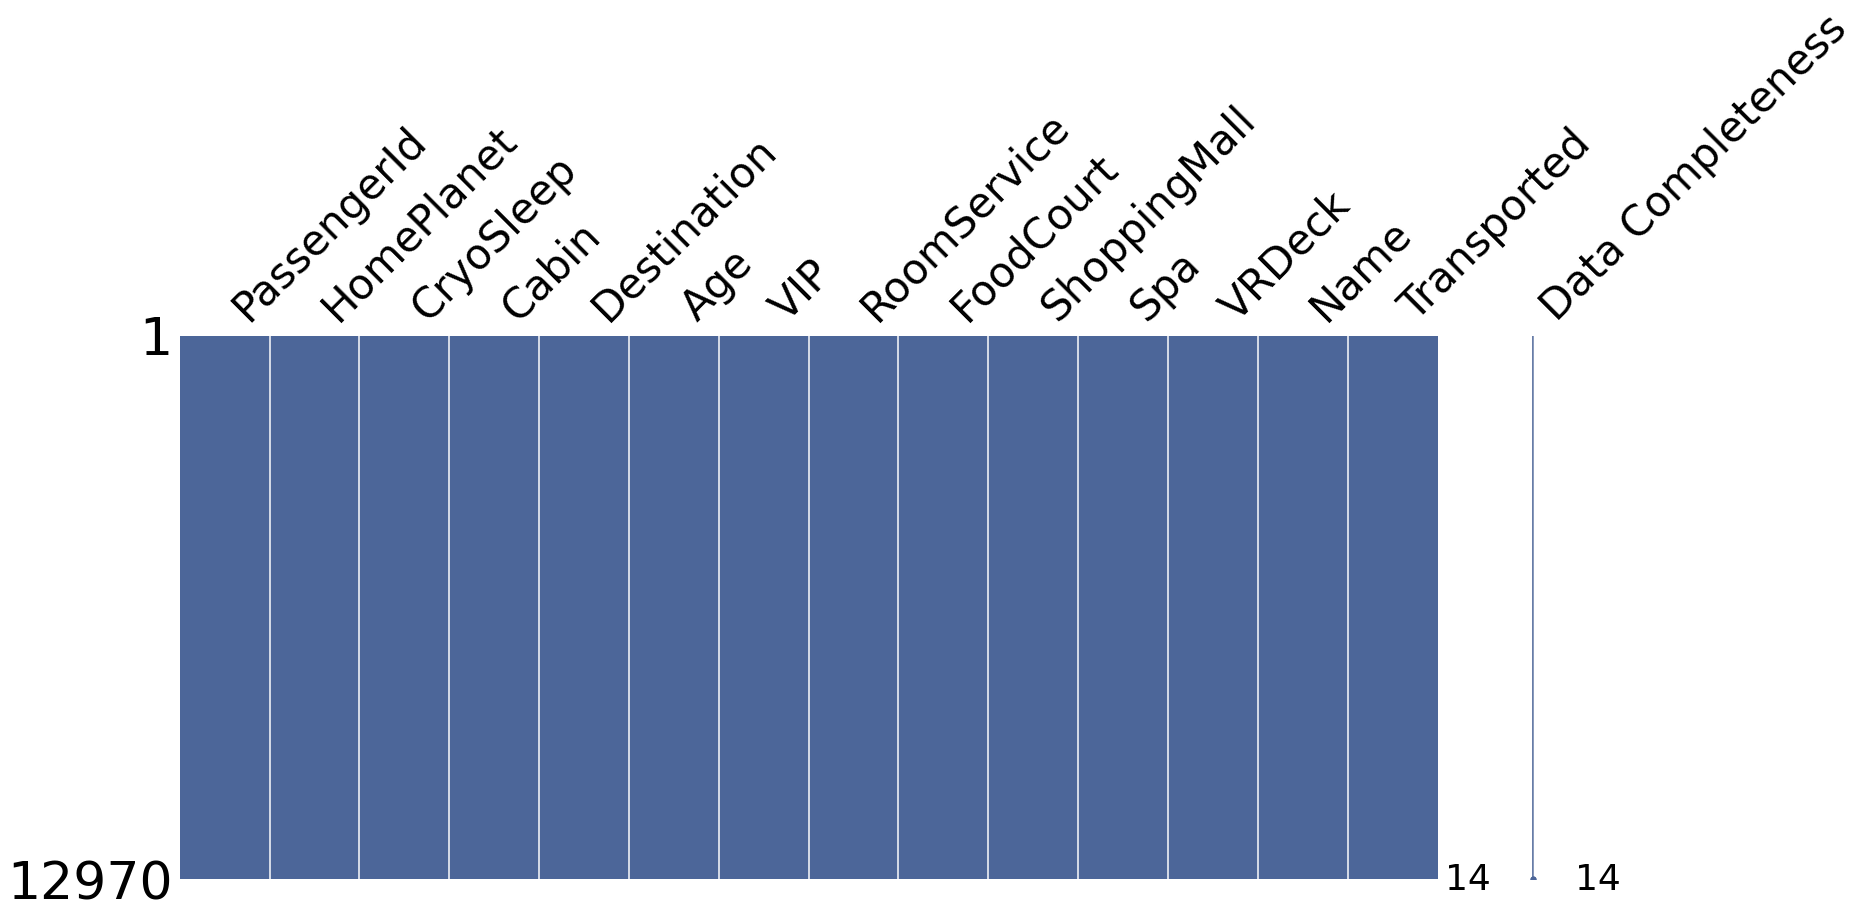

In [58]:
missingno.matrix(df_data,color=(0.3, 0.4, 0.6),fontsize=42,labels=True)

In [59]:
df_data.head(6)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0  Sandie Hinetthews   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True  
5        True

In [60]:
df_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [61]:
df_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [62]:
df_data[['CryoSleep', 'VIP', 'Transported']] = (df_data[['CryoSleep', 'VIP','Transported']] == True).astype(int)
#we converted only those with 2 values to numeric values

In [63]:
df_data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01     Europa          0  B/0/P  TRAPPIST-1e  39.0    0   
1     0002_01      Earth          0  F/0/S  TRAPPIST-1e  24.0    0   
2     0003_01     Europa          0  A/0/S  TRAPPIST-1e  58.0    1   
3     0003_02     Europa          0  A/0/S  TRAPPIST-1e  33.0    0   
4     0004_01      Earth          0  F/1/S  TRAPPIST-1e  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0            0  
1            1  
2            0  
3            0  
4            1

In [64]:
df_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         int32
Cabin            object
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int32
dtype: object

In [65]:
df_data.drop(['Name', 'Cabin','PassengerId'], axis=1, inplace=True)

In [66]:
df_data.dtypes

HomePlanet       object
CryoSleep         int32
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int32
dtype: object

In [67]:
df_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [68]:
obj_cols=["HomePlanet","Destination"]

In [ ]:
#Bu kodlar, sklearn kütüphanesindeki LabelEncoder ve OneHotEncoder sınıflarını 
#içe aktarır. 
#Bu sınıflar, kategorik verileri sayısal değerlere dönüştürmek için kullanılan 
#işlemleri gerçekleştirmek için kullanılır.

LabelEncoder: LabelEncoder sınıfı, kategorik (nominal veya ordinal) verileri 
    etiketlerine (label) göre sayısal değerlere dönüştürmek için kullanılır. 
    Örneğin, "Kırmızı", "Mavi", "Yeşil" gibi renk etiketlerini 0, 1, 2 gibi 
    sayısal değerlere dönüştürebilir. Bu dönüşüm, bir sınıflandırma modeline
    giriş olarak verilebilecek şekilde kategorik verilerin sayısal temsilini 
    sağlar.
    
OneHotEncoder: OneHotEncoder sınıfı, kategorik verileri "one-hot encoding" 
    yöntemiyle sayısal değerlere dönüştürmek için kullanılır. "One-hot encoding"
    , her kategori değerini yeni bir sütun olarak temsil etmeyi sağlar ve her 
    bir örnekte sadece bir sütunun değeri 1 olurken diğer sütunların değerleri 
    0 olur. Bu dönüşüm, kategorik verilerin sınıflandırma veya regresyon 
    modellerine giriş olarak kullanılması için sıklıkla gereklidir.

In [70]:
df_data.Destination

0          TRAPPIST-1e
1          TRAPPIST-1e
2          TRAPPIST-1e
3          TRAPPIST-1e
4          TRAPPIST-1e
             ...      
12965      TRAPPIST-1e
12966      TRAPPIST-1e
12967      55 Cancri e
12968          Unknown
12969    PSO J318.5-22
Name: Destination, Length: 12970, dtype: object

In [71]:
df_data.HomePlanet

0        Europa
1         Earth
2        Europa
3        Europa
4         Earth
          ...  
12965     Earth
12966     Earth
12967      Mars
12968    Europa
12969     Earth
Name: HomePlanet, Length: 12970, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [73]:
lblenc = LabelEncoder()
lblenc.fit(obj_cols) #fit yöntemi kullanılarak encoder'ı obj_cols listesindeki kategorik verilere uyumlandırıyoruz.
labels = lblenc.transform(obj_cols)
labels

array([1, 0])

In [74]:
labels.shape

(2,)

In [75]:
labels = labels.reshape(-1,1)

In [76]:
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
oh_labels

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [77]:
oh_labels.toarray()

array([[0., 1.],
       [1., 0.]])

In [78]:
data_oh = pd.get_dummies(df_data, columns=obj_cols)

In [79]:
data_oh

CryoSleep        Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0              0  39.000000    0          0.0        0.0           0.0   
1              0  24.000000    0        109.0        9.0          25.0   
2              0  58.000000    1         43.0     3576.0           0.0   
3              0  33.000000    0          0.0     1283.0         371.0   
4              0  16.000000    0        303.0       70.0         151.0   
...          ...        ...  ...          ...        ...           ...   
12965          1  34.000000    0          0.0        0.0           0.0   
12966          0  42.000000    0          0.0      847.0          17.0   
12967          1  28.771969    0          0.0        0.0           0.0   
12968          0  28.771969    0          0.0     2680.0           0.0   
12969          1  43.000000    0          0.0        0.0           0.0   

          Spa  VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0         0.0     0.0            0                 0                  1   
1       549.0    44.0            1                 1                  0   
2      6715.0    49.0            0                 0                  1   
3      3329.0   193.0            0                 0                  1   
4       565.0     2.0            1                 1                  0   
...       ...     ...          ...               ...                ...   
12965     0.0     0.0            0                 1                  0   
12966    10.0   144.0            0                 1                  0   
12967     0.0     0.0            0                 0                  0   
12968     0.0   523.0            0                 0                  1   
12969     0.0     0.0            0                 1                  0   

       HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
0                    0                   0                        0   
1                    0                   0                        0   
2                    0                   0                        0   
3                    0                   0                        0   
4                    0                   0                        0   
...                ...                 ...                      ...   
12965                0                   0                        0   
12966                0                   0                        0   
12967                1                   0                        1   
12968                0                   0                        0   
12969                0                   0                        0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
0                              0                        1                    0  
1                              0                        1                    0  
2                              0                        1                    0  
3                              0                        1                    0  
4                              0                        1                    0  
...                          ...                      ...                  ...  
12965                          0                        1                    0  
12966                          0                        1                    0  
12967                          0                        0                    0  
12968                          0                        0                    1  
12969                          1                        0                    0  

[12970 rows x 17 columns]

In [80]:
data_oh.dtypes

CryoSleep                      int32
Age                          float64
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int32
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
HomePlanet_Unknown             uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Destination_Unknown            uint8
dtype: object

In [81]:
numerical_cols=['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [82]:
data_oh[numerical_cols].describe().T

count        mean          std  min   25%   50%    75%  \
Age           12970.0   28.771969    14.236710  0.0  20.0  27.0   37.0   
RoomService   12970.0  222.897852   640.996685  0.0   0.0   0.0   79.0   
FoodCourt     12970.0  451.961675  1566.618306  0.0   0.0   0.0  126.0   
ShoppingMall  12970.0  174.906033   583.550067  0.0   0.0   0.0   47.0   
Spa           12970.0  308.476904  1117.835494  0.0   0.0   0.0   87.0   
VRDeck        12970.0  306.789482  1167.840416  0.0   0.0   0.0   64.0   

                  max  
Age              79.0  
RoomService   14327.0  
FoodCourt     29813.0  
ShoppingMall  23492.0  
Spa           22408.0  
VRDeck        24133.0

In [83]:
data_oh

CryoSleep        Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0              0  39.000000    0          0.0        0.0           0.0   
1              0  24.000000    0        109.0        9.0          25.0   
2              0  58.000000    1         43.0     3576.0           0.0   
3              0  33.000000    0          0.0     1283.0         371.0   
4              0  16.000000    0        303.0       70.0         151.0   
...          ...        ...  ...          ...        ...           ...   
12965          1  34.000000    0          0.0        0.0           0.0   
12966          0  42.000000    0          0.0      847.0          17.0   
12967          1  28.771969    0          0.0        0.0           0.0   
12968          0  28.771969    0          0.0     2680.0           0.0   
12969          1  43.000000    0          0.0        0.0           0.0   

          Spa  VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0         0.0     0.0            0                 0                  1   
1       549.0    44.0            1                 1                  0   
2      6715.0    49.0            0                 0                  1   
3      3329.0   193.0            0                 0                  1   
4       565.0     2.0            1                 1                  0   
...       ...     ...          ...               ...                ...   
12965     0.0     0.0            0                 1                  0   
12966    10.0   144.0            0                 1                  0   
12967     0.0     0.0            0                 0                  0   
12968     0.0   523.0            0                 0                  1   
12969     0.0     0.0            0                 1                  0   

       HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
0                    0                   0                        0   
1                    0                   0                        0   
2                    0                   0                        0   
3                    0                   0                        0   
4                    0                   0                        0   
...                ...                 ...                      ...   
12965                0                   0                        0   
12966                0                   0                        0   
12967                1                   0                        1   
12968                0                   0                        0   
12969                0                   0                        0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
0                              0                        1                    0  
1                              0                        1                    0  
2                              0                        1                    0  
3                              0                        1                    0  
4                              0                        1                    0  
...                          ...                      ...                  ...  
12965                          0                        1                    0  
12966                          0                        1                    0  
12967                          0                        0                    0  
12968                          0                        0                    1  
12969                          1                        0                    0  

[12970 rows x 17 columns]

In [84]:
#DataScaling#***
#veri önişleme aşamasında kullanılan ölçeklendirme yöntemleridir.
#MinMaxScaler, verileri belirli bir aralığa (genellikle [0, 1]) ölçeklendirmek için kullanılır. Bu yöntem, her özelliğin minimum ve maksimum değerlerini kullanarak verileri yeniden ölçeklendirir. Bu şekilde, veriler orijinal dağılımı korunarak belirli bir aralığa sıkıştırılır.
#StandardScaler, verileri ortalaması 0, standart sapması 1 olacak şekilde standartlaştırmak için kullanılır. Bu yöntem, her özelliğin ortalamasını ve standart sapmasını kullanarak verileri dönüştürür. Böylece, verilerin dağılımı ortalaması 0 ve standart sapması 1 olacak şekilde merkezlenir ve ölçeklendirilir.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [85]:
data_std=data_oh.copy()
data_minmax=data_oh.copy()

In [86]:
scaler = StandardScaler()
data_std[numerical_cols] = scaler.fit_transform(data_std[numerical_cols])

In [87]:
data_std[numerical_cols].describe().T

count          mean       std       min       25%       50%  \
Age           12970.0  3.037748e-16  1.000039 -2.021048 -0.616175 -0.124470   
RoomService   12970.0 -3.904612e-16  1.000039 -0.347750 -0.347750 -0.347750   
FoodCourt     12970.0  4.268752e-16  1.000039 -0.288506 -0.288506 -0.288506   
ShoppingMall  12970.0 -6.058976e-16  1.000039 -0.299739 -0.299739 -0.299739   
Spa           12970.0 -4.094386e-16  1.000039 -0.275970 -0.275970 -0.275970   
VRDeck        12970.0 -6.209374e-17  1.000039 -0.262708 -0.262708 -0.262708   

                   75%        max  
Age           0.577967   3.528201  
RoomService  -0.224499  22.004242  
FoodCourt    -0.208075  18.742389  
ShoppingMall -0.219194  39.958856  
Spa          -0.198138  19.770686  
VRDeck       -0.207904  20.402727

In [88]:
scaler = MinMaxScaler()
data_minmax[numerical_cols] = scaler.fit_transform(data_minmax[numerical_cols])

In [89]:
data_oh[numerical_cols].describe().T

count        mean          std  min   25%   50%    75%  \
Age           12970.0   28.771969    14.236710  0.0  20.0  27.0   37.0   
RoomService   12970.0  222.897852   640.996685  0.0   0.0   0.0   79.0   
FoodCourt     12970.0  451.961675  1566.618306  0.0   0.0   0.0  126.0   
ShoppingMall  12970.0  174.906033   583.550067  0.0   0.0   0.0   47.0   
Spa           12970.0  308.476904  1117.835494  0.0   0.0   0.0   87.0   
VRDeck        12970.0  306.789482  1167.840416  0.0   0.0   0.0   64.0   

                  max  
Age              79.0  
RoomService   14327.0  
FoodCourt     29813.0  
ShoppingMall  23492.0  
Spa           22408.0  
VRDeck        24133.0

In [90]:
data_minmax[numerical_cols].describe().T

count      mean       std  min       25%       50%       75%  \
Age           12970.0  0.364202  0.180212  0.0  0.253165  0.341772  0.468354   
RoomService   12970.0  0.015558  0.044740  0.0  0.000000  0.000000  0.005514   
FoodCourt     12970.0  0.015160  0.052548  0.0  0.000000  0.000000  0.004226   
ShoppingMall  12970.0  0.007445  0.024840  0.0  0.000000  0.000000  0.002001   
Spa           12970.0  0.013766  0.049886  0.0  0.000000  0.000000  0.003883   
VRDeck        12970.0  0.012712  0.048392  0.0  0.000000  0.000000  0.002652   

              max  
Age           1.0  
RoomService   1.0  
FoodCourt     1.0  
ShoppingMall  1.0  
Spa           1.0  
VRDeck        1.0

In [91]:
data_std['Transported']=data_std['Transported'].astype(bool).astype(float) 
#astype() yöntemi, bir veri çerçevesinin veya serisinin veri tiplerini dönüştürmek için kullanılır.

In [92]:
data_std

CryoSleep           Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0              0  7.184543e-01    0    -0.347750  -0.288506     -0.299739   
1              0 -3.352005e-01    0    -0.177696  -0.282761     -0.256896   
2              0  2.053084e+00    1    -0.280664   1.994205     -0.299739   
3              0  2.969924e-01    0    -0.347750   0.530487      0.336049   
4              0 -8.971498e-01    0     0.124970  -0.243822     -0.040968   
...          ...           ...  ...          ...        ...           ...   
12965          1  3.672360e-01    0    -0.347750  -0.288506     -0.299739   
12966          0  9.291853e-01    0    -0.347750   0.252170     -0.270606   
12967          1 -2.495556e-16    0    -0.347750  -0.288506     -0.299739   
12968          0 -2.495556e-16    0    -0.347750   1.422251     -0.299739   
12969          1  9.994289e-01    0    -0.347750  -0.288506     -0.299739   

            Spa    VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0     -0.275970 -0.262708          0.0                 0                  1   
1      0.215177 -0.225030          1.0                 1                  0   
2      5.731407 -0.220749          0.0                 0                  1   
3      2.702222 -0.097440          0.0                 0                  1   
4      0.229491 -0.260996          1.0                 1                  0   
...         ...       ...          ...               ...                ...   
12965 -0.275970 -0.262708          0.0                 1                  0   
12966 -0.267024 -0.139399          0.0                 1                  0   
12967 -0.275970 -0.262708          0.0                 0                  0   
12968 -0.275970  0.185144          0.0                 0                  1   
12969 -0.275970 -0.262708          0.0                 1                  0   

       HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
0                    0                   0                        0   
1                    0                   0                        0   
2                    0                   0                        0   
3                    0                   0                        0   
4                    0                   0                        0   
...                ...                 ...                      ...   
12965                0                   0                        0   
12966                0                   0                        0   
12967                1                   0                        1   
12968                0                   0                        0   
12969                0                   0                        0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
0                              0                        1                    0  
1                              0                        1                    0  
2                              0                        1                    0  
3                              0                        1                    0  
4                              0                        1                    0  
...                          ...                      ...                  ...  
12965                          0                        1                    0  
12966                          0                        1                    0  
12967                          0                        0                    0  
12968                          0                        0                    1  
12969                          1                        0                    0  

[12970 rows x 17 columns]

In [93]:
data_minmax['Transported']=data_minmax['Transported'].astype(bool).astype(float)

In [94]:
data_minmax

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0              0  0.493671    0     0.000000   0.000000      0.000000   
1              0  0.303797    0     0.007608   0.000302      0.001064   
2              0  0.734177    1     0.003001   0.119948      0.000000   
3              0  0.417722    0     0.000000   0.043035      0.015793   
4              0  0.202532    0     0.021149   0.002348      0.006428   
...          ...       ...  ...          ...        ...           ...   
12965          1  0.430380    0     0.000000   0.000000      0.000000   
12966          0  0.531646    0     0.000000   0.028410      0.000724   
12967          1  0.364202    0     0.000000   0.000000      0.000000   
12968          0  0.364202    0     0.000000   0.089894      0.000000   
12969          1  0.544304    0     0.000000   0.000000      0.000000   

            Spa    VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0      0.000000  0.000000          0.0                 0                  1   
1      0.024500  0.001823          1.0                 1                  0   
2      0.299670  0.002030          0.0                 0                  1   
3      0.148563  0.007997          0.0                 0                  1   
4      0.025214  0.000083          1.0                 1                  0   
...         ...       ...          ...               ...                ...   
12965  0.000000  0.000000          0.0                 1                  0   
12966  0.000446  0.005967          0.0                 1                  0   
12967  0.000000  0.000000          0.0                 0                  0   
12968  0.000000  0.021672          0.0                 0                  1   
12969  0.000000  0.000000          0.0                 1                  0   

       HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
0                    0                   0                        0   
1                    0                   0                        0   
2                    0                   0                        0   
3                    0                   0                        0   
4                    0                   0                        0   
...                ...                 ...                      ...   
12965                0                   0                        0   
12966                0                   0                        0   
12967                1                   0                        1   
12968                0                   0                        0   
12969                0                   0                        0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
0                              0                        1                    0  
1                              0                        1                    0  
2                              0                        1                    0  
3                              0                        1                    0  
4                              0                        1                    0  
...                          ...                      ...                  ...  
12965                          0                        1                    0  
12966                          0                        1                    0  
12967                          0                        0                    0  
12968                          0                        0                    1  
12969                          1                        0                    0  

[12970 rows x 17 columns]

In [95]:
train = data_std[0:len(df_train)]#df_train uzunluğu kadar bir veri büyüklüğü
test  = data_std[len(df_train):] #df_train veri uzunluğundan sonraki kısmı içine alır

In [96]:
train.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0          0  0.718454    0    -0.347750  -0.288506     -0.299739 -0.275970   
1          0 -0.335201    0    -0.177696  -0.282761     -0.256896  0.215177   
2          0  2.053084    1    -0.280664   1.994205     -0.299739  5.731407   
3          0  0.296992    0    -0.347750   0.530487      0.336049  2.702222   
4          0 -0.897150    0     0.124970  -0.243822     -0.040968  0.229491   

     VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0 -0.262708          0.0                 0                  1   
1 -0.225030          1.0                 1                  0   
2 -0.220749          0.0                 0                  1   
3 -0.097440          0.0                 0                  1   
4 -0.260996          1.0                 1                  0   

   HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
0                0                   0                        0   
1                0                   0                        0   
2                0                   0                        0   
3                0                   0                        0   
4                0                   0                        0   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
0                          0                        1                    0  
1                          0                        1                    0  
2                          0                        1                    0  
3                          0                        1                    0  
4                          0                        1                    0

In [97]:
test.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
8693          1 -0.124470    0    -0.347750  -0.288506     -0.299739   
8694          0 -0.686419    0    -0.347750  -0.282761     -0.299739   
8695          1  0.156505    0    -0.347750  -0.288506     -0.299739   
8696          0  0.648211    0    -0.347750   3.957746     -0.299739   
8697          0 -0.616175    0    -0.332148  -0.288506      0.788470   

           Spa    VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
8693 -0.275970 -0.262708          0.0                 1                  0   
8694  2.249544 -0.262708          0.0                 1                  0   
8695 -0.275970 -0.262708          0.0                 0                  1   
8696 -0.114043  0.238236          0.0                 0                  1   
8697 -0.275970 -0.262708          0.0                 1                  0   

      HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
8693                0                   0                        0   
8694                0                   0                        0   
8695                0                   0                        1   
8696                0                   0                        0   
8697                0                   0                        0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
8693                          0                        1                    0  
8694                          0                        1                    0  
8695                          0                        0                    0  
8696                          0                        1                    0  
8697                          0                        1                    0

In [98]:
train.drop_duplicates(inplace = True)
#Verilen kodda, train veri çerçevesinden yinelenen satırların kaldırılması işlemi gerçekleştirilmektedir.

#Yinelenen satırların kaldırılması, veri setinin temizlenmesi 
#ve daha doğru sonuçlar elde etmek için önemlidir. Yinelenen satırlar, 
#aynı veri noktalarının birden fazla kez göründüğü durumlarda ortaya çıkabilir 
#ve bu durum modelin yanlı bir şekilde eğitilmesine veya değerlendirilmesine 
#neden olabilir. Bu nedenle, 
#yinelenen satırların kaldırılması veri setinin doğruluğunu artırabilir.

In [99]:
X = train.drop('Transported', axis = 1) #hedef değişkeni çıkartırız geriye kalan budur
y = train['Transported'] #target variable 

In [100]:
X_test = test.drop('Transported', axis=1)
y_test = test['Transported'] #burası farklı olabilir!!*********

In [101]:
y_test

8693     0.0
8694     0.0
8695     0.0
8696     0.0
8697     0.0
        ... 
12965    0.0
12966    0.0
12967    0.0
12968    0.0
12969    0.0
Name: Transported, Length: 4277, dtype: float64

In [102]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8687    1.0
8688    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 6340, dtype: float64

In [103]:
test.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
8693          1 -0.124470    0    -0.347750  -0.288506     -0.299739   
8694          0 -0.686419    0    -0.347750  -0.282761     -0.299739   
8695          1  0.156505    0    -0.347750  -0.288506     -0.299739   
8696          0  0.648211    0    -0.347750   3.957746     -0.299739   
8697          0 -0.616175    0    -0.332148  -0.288506      0.788470   

           Spa    VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
8693 -0.275970 -0.262708          0.0                 1                  0   
8694  2.249544 -0.262708          0.0                 1                  0   
8695 -0.275970 -0.262708          0.0                 0                  1   
8696 -0.114043  0.238236          0.0                 0                  1   
8697 -0.275970 -0.262708          0.0                 1                  0   

      HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
8693                0                   0                        0   
8694                0                   0                        0   
8695                0                   0                        1   
8696                0                   0                        0   
8697                0                   0                        0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
8693                          0                        1                    0  
8694                          0                        1                    0  
8695                          0                        0                    0  
8696                          0                        1                    0  
8697                          0                        1                    0

In [104]:
X_test.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
8693          1 -0.124470    0    -0.347750  -0.288506     -0.299739   
8694          0 -0.686419    0    -0.347750  -0.282761     -0.299739   
8695          1  0.156505    0    -0.347750  -0.288506     -0.299739   
8696          0  0.648211    0    -0.347750   3.957746     -0.299739   
8697          0 -0.616175    0    -0.332148  -0.288506      0.788470   

           Spa    VRDeck  HomePlanet_Earth  HomePlanet_Europa  \
8693 -0.275970 -0.262708                 1                  0   
8694  2.249544 -0.262708                 1                  0   
8695 -0.275970 -0.262708                 0                  1   
8696 -0.114043  0.238236                 0                  1   
8697 -0.275970 -0.262708                 1                  0   

      HomePlanet_Mars  HomePlanet_Unknown  Destination_55 Cancri e  \
8693                0                   0                        0   
8694                0                   0                        0   
8695                0                   0                        1   
8696                0                   0                        0   
8697                0                   0                        0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Destination_Unknown  
8693                          0                        1                    0  
8694                          0                        1                    0  
8695                          0                        0                    0  
8696                          0                        1                    0  
8697                          0                        1                    0

In [105]:
#Verilen kod, K-katlamalı çapraz doğrulama (K-fold cross-validation) 
#işlemi için KFold sınıfını kullanarak ayarlamalar yapmayı 
#ve doğruluk skorlarını saklamak için bir liste oluşturmayı sağlar.

#n_splits=7 parametresi veri setinin 7 katmana bölüneceğini belirtir!

#shuffle=True parametresi veri setinin her parçalandığında karıştırılacağını belirtir

#random_state=42

kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = [] #sonuçları saklamak için kullanılır

In [106]:
#Verilen kod, K-katlamalı çapraz doğrulama işlemi sırasında her bir katlama 
#için eğitim ve doğrulama (validation) setlerinin oluşturulmasını, 
#bir modelin eğitilmesini ve doğruluk skorunun hesaplanarak val_scores listesine eklenmesini sağlar. 
#Ayrıca, her bir katlama sonucu için skorun ekrana yazdırılmasını sağlar.

#for döngüsü, kfold.split(X) ile elde edilen her bir katlamanın üzerinde döner.

#tr_idx ve val_idx değişkenleri, eğitim ve doğrulama setlerinin indekslerini tutar.

#X_tr, X_val, y_tr ve y_val değişkenleri, iloc() yöntemi ile veri kümesinin ilgili indekslerine göre bölünerek eğitim ve doğrulama setlerini oluşturur.

#model değişkeni, LogisticRegression() sınıfından bir lojistik regresyon modelini temsil eder.

#model.fit(X_tr, y_tr) yöntemi, lojistik regresyon modelini eğitim veri kümesine uyarlar.

#y_pred = model.predict(X_val) yöntemi, eğitilen modeli kullanarak doğrulama setinde tahminler yapar. 
#yani validasyon setinden tahminler yapıyor 

#score = accuracy_score(y_val, y_pred) yöntemi, gerçek doğrulama etiketleri 
#(y_val) ile tahmin edilen etiketler (y_pred) arasındaki doğruluk skorunu 
#hesaplar.

#val_scores.append(score) kodu, her bir katlama sonucundaki doğruluk skorunu 
#val_scores listesine ekler.

#print(f"{i+1} fold: {score:10.5f}") kodu, her bir katlama sonucunun indeksini 
#ve doğruluk skorunu ekrana yazdırır.



In [107]:
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val= X.iloc[tr_idx], X.iloc[val_idx] 
    
    y_tr, y_val =y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.7f}")

1 fold :  0.8004732
2 fold :  0.7649842
3 fold :  0.7547319
4 fold :  0.7681388
5 fold :  0.7894322


In [108]:
np.mean(val_scores)
#val_scores listesindeki değerlerin ortalamasını alıyoruz!!

0.7755520504731862

In [109]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = XGBClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.7f}")

1 fold :  0.7941640
2 fold :  0.7436909
3 fold :  0.7500000
4 fold :  0.7641956
5 fold :  0.7578864


In [110]:
np.mean(val_scores)

0.7619873817034699

In [111]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val =y.iloc[tr_idx], y.iloc[val_idx]
    
    model = RandomForestClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.7f}")

1 fold :  0.7831230
2 fold :  0.7326498
3 fold :  0.7326498
4 fold :  0.7452681
5 fold :  0.7436909


In [112]:
np.mean(val_scores)

0.7474763406940064

In [113]:
best_params_LR = {'C': 368.11441461762684, 'l1_ratio': 0.82463998824527}

In [114]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LogisticRegression(**best_params_LR)
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.7f}")

1 fold :  0.7996845
2 fold :  0.7641956
3 fold :  0.7578864
4 fold :  0.7689274
5 fold :  0.7886435


In [115]:
best_xgb_params = {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 
                   'n_estimators': 730, 'max_depth': 5, 
                   'learning_rate': 0.01, 'colsample_bytree': 0.8}

In [116]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = XGBClassifier(**best_xgb_params)
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")
    
np.mean(val_scores)   

1 fold :    0.81230
2 fold :    0.77445
3 fold :    0.77208
4 fold :    0.77524
5 fold :    0.78312


0.7834384858044163

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
best_params_DTC = {'max_depth': 12,  'min_samples_split': 10,  
                   'min_samples_leaf': 4,  'max_features': 'auto'}

In [119]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = DecisionTreeClassifier(**best_params_DTC)
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")
    
np.mean(val_scores)  

1 fold :    0.75237
2 fold :    0.73423
3 fold :    0.72397
4 fold :    0.74211
5 fold :    0.72240


0.7350157728706624

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
best_params_kNC = {'n_neighbors': 9, 'metric': 'l1', 'weights': 'uniform'}

In [122]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = KNeighborsClassifier(**best_params_kNC)
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")
    
np.mean(val_scores)  

1 fold :    0.76025
2 fold :    0.73344
3 fold :    0.73423
4 fold :    0.74685
5 fold :    0.75710


0.746372239747634

In [123]:
best_xgb_params = XGBClassifier(**best_xgb_params)
best_params_DTC = DecisionTreeClassifier(**best_params_DTC)
best_params_kNC = KNeighborsClassifier(**best_params_kNC)

In [124]:
from sklearn.ensemble import VotingClassifier

In [125]:
voting = VotingClassifier(estimators=[('XGB', best_xgb_params), 
                                      ('DTC', best_params_DTC),
                                      ('kNC', best_params_kNC)],voting='soft')
voting.fit(X_tr,y_tr)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=730, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('DTC',
                              DecisionTreeClassifier(max_depth=12,
                                                     max_features='auto',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('kNC',
                              KNeighborsClassifier(metric='l1',
                                                   n_neighbors=9))],
                 voting='soft')

In [126]:
scores=[]

In [127]:
y_pred = voting.predict(X_tr)
acc_final = accuracy_score(y_tr,y_pred)
scores.append(['Final soft voting with xgb', acc_final])
print("Accuracy",acc_final)

Accuracy 0.8282728706624606


In [128]:
scores

[['Final soft voting with xgb', 0.8282728706624606]]

In [129]:
voting_pred = voting.predict(X_test)

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
   
    model = RandomForestClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")

1 fold :    0.77681
2 fold :    0.73265
3 fold :    0.73659
4 fold :    0.74211
5 fold :    0.74211


In [132]:
best_params_RFC = {'n_estimators' : 100, 
                   'max_depth' : 12,
                   'min_samples_leaf' : 8,
                   'min_samples_split' : 8,
                   'random_state' : 0,
                   'n_jobs' : -1}

In [133]:
kfold = KFold(n_splits=5, shuffle=True, random_state=135)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = RandomForestClassifier(**best_params_RFC)
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")
    
np.mean(val_scores)   

1 fold :    0.81230
2 fold :    0.76972
3 fold :    0.76656
4 fold :    0.77681
5 fold :    0.78470


0.782018927444795

In [134]:
from catboost import CatBoostClassifier

In [135]:
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
   
    model = CatBoostClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")

Learning rate set to 0.020608
0:	learn: 0.6851368	total: 174ms	remaining: 2m 54s
1:	learn: 0.6771188	total: 192ms	remaining: 1m 35s
2:	learn: 0.6699811	total: 202ms	remaining: 1m 7s
3:	learn: 0.6627054	total: 213ms	remaining: 53s
4:	learn: 0.6555775	total: 232ms	remaining: 46.2s
5:	learn: 0.6497117	total: 250ms	remaining: 41.4s
6:	learn: 0.6433298	total: 266ms	remaining: 37.7s
7:	learn: 0.6375309	total: 281ms	remaining: 34.8s
8:	learn: 0.6317407	total: 294ms	remaining: 32.4s
9:	learn: 0.6260394	total: 307ms	remaining: 30.4s
10:	learn: 0.6201879	total: 322ms	remaining: 29s
11:	learn: 0.6159840	total: 337ms	remaining: 27.7s
12:	learn: 0.6106575	total: 351ms	remaining: 26.7s
13:	learn: 0.6062407	total: 365ms	remaining: 25.7s
14:	learn: 0.6016033	total: 379ms	remaining: 24.9s
15:	learn: 0.5974203	total: 397ms	remaining: 24.4s
16:	learn: 0.5931707	total: 414ms	remaining: 23.9s
17:	learn: 0.5888397	total: 435ms	remaining: 23.8s
18:	learn: 0.5853203	total: 451ms	remaining: 23.3s
19:	learn: 0.

166:	learn: 0.4474851	total: 2.64s	remaining: 13.2s
167:	learn: 0.4472527	total: 2.65s	remaining: 13.1s
168:	learn: 0.4470684	total: 2.67s	remaining: 13.1s
169:	learn: 0.4468741	total: 2.69s	remaining: 13.1s
170:	learn: 0.4466259	total: 2.7s	remaining: 13.1s
171:	learn: 0.4464069	total: 2.71s	remaining: 13.1s
172:	learn: 0.4462644	total: 2.73s	remaining: 13s
173:	learn: 0.4460877	total: 2.74s	remaining: 13s
174:	learn: 0.4459412	total: 2.75s	remaining: 13s
175:	learn: 0.4457078	total: 2.77s	remaining: 13s
176:	learn: 0.4455371	total: 2.78s	remaining: 12.9s
177:	learn: 0.4453277	total: 2.79s	remaining: 12.9s
178:	learn: 0.4451618	total: 2.81s	remaining: 12.9s
179:	learn: 0.4450077	total: 2.82s	remaining: 12.8s
180:	learn: 0.4448666	total: 2.84s	remaining: 12.8s
181:	learn: 0.4447105	total: 2.85s	remaining: 12.8s
182:	learn: 0.4445454	total: 2.87s	remaining: 12.8s
183:	learn: 0.4443744	total: 2.88s	remaining: 12.8s
184:	learn: 0.4441223	total: 2.9s	remaining: 12.8s
185:	learn: 0.4439648	

325:	learn: 0.4234117	total: 5.17s	remaining: 10.7s
326:	learn: 0.4233333	total: 5.18s	remaining: 10.7s
327:	learn: 0.4232101	total: 5.2s	remaining: 10.6s
328:	learn: 0.4230717	total: 5.21s	remaining: 10.6s
329:	learn: 0.4230598	total: 5.22s	remaining: 10.6s
330:	learn: 0.4229511	total: 5.24s	remaining: 10.6s
331:	learn: 0.4228404	total: 5.25s	remaining: 10.6s
332:	learn: 0.4227996	total: 5.26s	remaining: 10.5s
333:	learn: 0.4226912	total: 5.28s	remaining: 10.5s
334:	learn: 0.4225923	total: 5.29s	remaining: 10.5s
335:	learn: 0.4225058	total: 5.3s	remaining: 10.5s
336:	learn: 0.4223980	total: 5.32s	remaining: 10.5s
337:	learn: 0.4223086	total: 5.33s	remaining: 10.4s
338:	learn: 0.4222020	total: 5.34s	remaining: 10.4s
339:	learn: 0.4221127	total: 5.36s	remaining: 10.4s
340:	learn: 0.4219634	total: 5.37s	remaining: 10.4s
341:	learn: 0.4218233	total: 5.39s	remaining: 10.4s
342:	learn: 0.4217385	total: 5.41s	remaining: 10.4s
343:	learn: 0.4216258	total: 5.42s	remaining: 10.3s
344:	learn: 0.

484:	learn: 0.4061232	total: 8.04s	remaining: 8.54s
485:	learn: 0.4060036	total: 8.06s	remaining: 8.53s
486:	learn: 0.4058993	total: 8.08s	remaining: 8.51s
487:	learn: 0.4057454	total: 8.11s	remaining: 8.51s
488:	learn: 0.4055672	total: 8.13s	remaining: 8.5s
489:	learn: 0.4054792	total: 8.2s	remaining: 8.53s
490:	learn: 0.4053776	total: 8.23s	remaining: 8.53s
491:	learn: 0.4052950	total: 8.26s	remaining: 8.53s
492:	learn: 0.4051651	total: 8.28s	remaining: 8.52s
493:	learn: 0.4049088	total: 8.3s	remaining: 8.5s
494:	learn: 0.4048490	total: 8.31s	remaining: 8.48s
495:	learn: 0.4047621	total: 8.35s	remaining: 8.48s
496:	learn: 0.4046345	total: 8.38s	remaining: 8.49s
497:	learn: 0.4045595	total: 8.43s	remaining: 8.49s
498:	learn: 0.4044692	total: 8.46s	remaining: 8.49s
499:	learn: 0.4043917	total: 8.48s	remaining: 8.48s
500:	learn: 0.4043013	total: 8.5s	remaining: 8.47s
501:	learn: 0.4041421	total: 8.56s	remaining: 8.49s
502:	learn: 0.4040520	total: 8.59s	remaining: 8.49s
503:	learn: 0.403

645:	learn: 0.3879786	total: 11.4s	remaining: 6.24s
646:	learn: 0.3879228	total: 11.4s	remaining: 6.22s
647:	learn: 0.3877610	total: 11.4s	remaining: 6.2s
648:	learn: 0.3876215	total: 11.4s	remaining: 6.18s
649:	learn: 0.3874844	total: 11.4s	remaining: 6.16s
650:	learn: 0.3874082	total: 11.5s	remaining: 6.14s
651:	learn: 0.3873382	total: 11.5s	remaining: 6.13s
652:	learn: 0.3872430	total: 11.5s	remaining: 6.1s
653:	learn: 0.3871788	total: 11.5s	remaining: 6.08s
654:	learn: 0.3870003	total: 11.5s	remaining: 6.06s
655:	learn: 0.3868887	total: 11.5s	remaining: 6.05s
656:	learn: 0.3867698	total: 11.5s	remaining: 6.03s
657:	learn: 0.3866983	total: 11.6s	remaining: 6.01s
658:	learn: 0.3865820	total: 11.6s	remaining: 5.99s
659:	learn: 0.3865012	total: 11.6s	remaining: 5.98s
660:	learn: 0.3864260	total: 11.6s	remaining: 5.96s
661:	learn: 0.3862303	total: 11.6s	remaining: 5.94s
662:	learn: 0.3861476	total: 11.7s	remaining: 5.92s
663:	learn: 0.3860103	total: 11.7s	remaining: 5.91s
664:	learn: 0.

806:	learn: 0.3712240	total: 14.9s	remaining: 3.56s
807:	learn: 0.3710205	total: 14.9s	remaining: 3.54s
808:	learn: 0.3709605	total: 14.9s	remaining: 3.52s
809:	learn: 0.3708653	total: 14.9s	remaining: 3.5s
810:	learn: 0.3707761	total: 15s	remaining: 3.48s
811:	learn: 0.3706596	total: 15s	remaining: 3.47s
812:	learn: 0.3704779	total: 15s	remaining: 3.45s
813:	learn: 0.3703839	total: 15s	remaining: 3.43s
814:	learn: 0.3702768	total: 15s	remaining: 3.41s
815:	learn: 0.3702111	total: 15s	remaining: 3.39s
816:	learn: 0.3700436	total: 15s	remaining: 3.37s
817:	learn: 0.3699571	total: 15s	remaining: 3.35s
818:	learn: 0.3698875	total: 15.1s	remaining: 3.33s
819:	learn: 0.3697600	total: 15.1s	remaining: 3.31s
820:	learn: 0.3696800	total: 15.1s	remaining: 3.29s
821:	learn: 0.3696087	total: 15.1s	remaining: 3.27s
822:	learn: 0.3695667	total: 15.1s	remaining: 3.25s
823:	learn: 0.3694274	total: 15.1s	remaining: 3.23s
824:	learn: 0.3693327	total: 15.1s	remaining: 3.21s
825:	learn: 0.3691960	total: 

967:	learn: 0.3559140	total: 17.4s	remaining: 576ms
968:	learn: 0.3558454	total: 17.4s	remaining: 558ms
969:	learn: 0.3556933	total: 17.5s	remaining: 540ms
970:	learn: 0.3555929	total: 17.5s	remaining: 522ms
971:	learn: 0.3554437	total: 17.5s	remaining: 504ms
972:	learn: 0.3553824	total: 17.5s	remaining: 486ms
973:	learn: 0.3553194	total: 17.5s	remaining: 468ms
974:	learn: 0.3552216	total: 17.5s	remaining: 450ms
975:	learn: 0.3551553	total: 17.6s	remaining: 432ms
976:	learn: 0.3551266	total: 17.6s	remaining: 414ms
977:	learn: 0.3550306	total: 17.6s	remaining: 396ms
978:	learn: 0.3549294	total: 17.6s	remaining: 378ms
979:	learn: 0.3548349	total: 17.6s	remaining: 360ms
980:	learn: 0.3546829	total: 17.6s	remaining: 342ms
981:	learn: 0.3545971	total: 17.7s	remaining: 324ms
982:	learn: 0.3544700	total: 17.7s	remaining: 306ms
983:	learn: 0.3544182	total: 17.7s	remaining: 288ms
984:	learn: 0.3543629	total: 17.7s	remaining: 270ms
985:	learn: 0.3542616	total: 17.7s	remaining: 252ms
986:	learn: 

132:	learn: 0.4486102	total: 3.11s	remaining: 20.3s
133:	learn: 0.4483314	total: 3.15s	remaining: 20.3s
134:	learn: 0.4480530	total: 3.19s	remaining: 20.4s
135:	learn: 0.4476982	total: 3.22s	remaining: 20.5s
136:	learn: 0.4474652	total: 3.25s	remaining: 20.5s
137:	learn: 0.4471292	total: 3.27s	remaining: 20.5s
138:	learn: 0.4468465	total: 3.3s	remaining: 20.5s
139:	learn: 0.4465223	total: 3.35s	remaining: 20.6s
140:	learn: 0.4463011	total: 3.42s	remaining: 20.9s
141:	learn: 0.4460145	total: 3.47s	remaining: 21s
142:	learn: 0.4457116	total: 3.5s	remaining: 21s
143:	learn: 0.4455478	total: 3.54s	remaining: 21s
144:	learn: 0.4452326	total: 3.58s	remaining: 21.1s
145:	learn: 0.4450041	total: 3.6s	remaining: 21.1s
146:	learn: 0.4447349	total: 3.66s	remaining: 21.2s
147:	learn: 0.4445425	total: 3.7s	remaining: 21.3s
148:	learn: 0.4443636	total: 3.72s	remaining: 21.2s
149:	learn: 0.4440671	total: 3.74s	remaining: 21.2s
150:	learn: 0.4438036	total: 3.76s	remaining: 21.2s
151:	learn: 0.4436206	

292:	learn: 0.4197016	total: 10.6s	remaining: 25.7s
293:	learn: 0.4195361	total: 10.7s	remaining: 25.6s
294:	learn: 0.4194351	total: 10.7s	remaining: 25.5s
295:	learn: 0.4192672	total: 10.7s	remaining: 25.4s
296:	learn: 0.4191982	total: 10.7s	remaining: 25.4s
297:	learn: 0.4191134	total: 10.7s	remaining: 25.3s
298:	learn: 0.4189804	total: 10.8s	remaining: 25.2s
299:	learn: 0.4188458	total: 10.8s	remaining: 25.2s
300:	learn: 0.4187238	total: 10.8s	remaining: 25.1s
301:	learn: 0.4185738	total: 10.8s	remaining: 25s
302:	learn: 0.4184918	total: 10.9s	remaining: 25s
303:	learn: 0.4183410	total: 10.9s	remaining: 24.9s
304:	learn: 0.4182137	total: 10.9s	remaining: 24.9s
305:	learn: 0.4180386	total: 10.9s	remaining: 24.8s
306:	learn: 0.4179502	total: 11s	remaining: 24.8s
307:	learn: 0.4178407	total: 11s	remaining: 24.7s
308:	learn: 0.4177028	total: 11s	remaining: 24.6s
309:	learn: 0.4174943	total: 11s	remaining: 24.6s
310:	learn: 0.4172932	total: 11.1s	remaining: 24.5s
311:	learn: 0.4172000	to

458:	learn: 0.4011422	total: 15.2s	remaining: 17.9s
459:	learn: 0.4010383	total: 15.2s	remaining: 17.9s
460:	learn: 0.4008936	total: 15.3s	remaining: 17.8s
461:	learn: 0.4006666	total: 15.3s	remaining: 17.8s
462:	learn: 0.4005993	total: 15.3s	remaining: 17.7s
463:	learn: 0.4004645	total: 15.3s	remaining: 17.7s
464:	learn: 0.4003721	total: 15.3s	remaining: 17.6s
465:	learn: 0.4002357	total: 15.4s	remaining: 17.6s
466:	learn: 0.4001154	total: 15.4s	remaining: 17.6s
467:	learn: 0.4000079	total: 15.4s	remaining: 17.5s
468:	learn: 0.3999220	total: 15.4s	remaining: 17.5s
469:	learn: 0.3998124	total: 15.5s	remaining: 17.4s
470:	learn: 0.3996565	total: 15.5s	remaining: 17.4s
471:	learn: 0.3995158	total: 15.5s	remaining: 17.4s
472:	learn: 0.3993820	total: 15.6s	remaining: 17.3s
473:	learn: 0.3993050	total: 15.6s	remaining: 17.3s
474:	learn: 0.3990586	total: 15.6s	remaining: 17.3s
475:	learn: 0.3989445	total: 15.6s	remaining: 17.2s
476:	learn: 0.3988686	total: 15.7s	remaining: 17.2s
477:	learn: 

624:	learn: 0.3822645	total: 19.5s	remaining: 11.7s
625:	learn: 0.3821915	total: 19.5s	remaining: 11.6s
626:	learn: 0.3820142	total: 19.5s	remaining: 11.6s
627:	learn: 0.3819366	total: 19.5s	remaining: 11.6s
628:	learn: 0.3818384	total: 19.6s	remaining: 11.5s
629:	learn: 0.3816951	total: 19.6s	remaining: 11.5s
630:	learn: 0.3815689	total: 19.6s	remaining: 11.5s
631:	learn: 0.3814892	total: 19.6s	remaining: 11.4s
632:	learn: 0.3813490	total: 19.6s	remaining: 11.4s
633:	learn: 0.3811482	total: 19.7s	remaining: 11.3s
634:	learn: 0.3810722	total: 19.7s	remaining: 11.3s
635:	learn: 0.3808805	total: 19.7s	remaining: 11.3s
636:	learn: 0.3808392	total: 19.7s	remaining: 11.2s
637:	learn: 0.3807204	total: 19.7s	remaining: 11.2s
638:	learn: 0.3806699	total: 19.8s	remaining: 11.2s
639:	learn: 0.3804833	total: 19.8s	remaining: 11.1s
640:	learn: 0.3803634	total: 19.8s	remaining: 11.1s
641:	learn: 0.3802833	total: 19.8s	remaining: 11.1s
642:	learn: 0.3801570	total: 19.8s	remaining: 11s
643:	learn: 0.

792:	learn: 0.3646166	total: 23.4s	remaining: 6.11s
793:	learn: 0.3645255	total: 23.4s	remaining: 6.08s
794:	learn: 0.3644107	total: 23.4s	remaining: 6.05s
795:	learn: 0.3642942	total: 23.5s	remaining: 6.01s
796:	learn: 0.3642314	total: 23.5s	remaining: 5.98s
797:	learn: 0.3641751	total: 23.5s	remaining: 5.95s
798:	learn: 0.3640541	total: 23.5s	remaining: 5.92s
799:	learn: 0.3639097	total: 23.6s	remaining: 5.89s
800:	learn: 0.3638133	total: 23.6s	remaining: 5.86s
801:	learn: 0.3637122	total: 23.6s	remaining: 5.83s
802:	learn: 0.3635905	total: 23.6s	remaining: 5.8s
803:	learn: 0.3634444	total: 23.7s	remaining: 5.77s
804:	learn: 0.3633720	total: 23.7s	remaining: 5.74s
805:	learn: 0.3632820	total: 23.7s	remaining: 5.7s
806:	learn: 0.3631749	total: 23.7s	remaining: 5.67s
807:	learn: 0.3631215	total: 23.7s	remaining: 5.64s
808:	learn: 0.3630383	total: 23.7s	remaining: 5.61s
809:	learn: 0.3629490	total: 23.8s	remaining: 5.57s
810:	learn: 0.3627927	total: 23.8s	remaining: 5.54s
811:	learn: 0.

956:	learn: 0.3486838	total: 26.8s	remaining: 1.2s
957:	learn: 0.3486106	total: 26.8s	remaining: 1.18s
958:	learn: 0.3485138	total: 26.9s	remaining: 1.15s
959:	learn: 0.3484496	total: 26.9s	remaining: 1.12s
960:	learn: 0.3483503	total: 26.9s	remaining: 1.09s
961:	learn: 0.3482613	total: 26.9s	remaining: 1.06s
962:	learn: 0.3481881	total: 26.9s	remaining: 1.03s
963:	learn: 0.3481151	total: 26.9s	remaining: 1.01s
964:	learn: 0.3479892	total: 27s	remaining: 978ms
965:	learn: 0.3478798	total: 27s	remaining: 949ms
966:	learn: 0.3477739	total: 27s	remaining: 921ms
967:	learn: 0.3476867	total: 27s	remaining: 893ms
968:	learn: 0.3475495	total: 27s	remaining: 865ms
969:	learn: 0.3474796	total: 27s	remaining: 836ms
970:	learn: 0.3474431	total: 27.1s	remaining: 808ms
971:	learn: 0.3473463	total: 27.1s	remaining: 780ms
972:	learn: 0.3472922	total: 27.1s	remaining: 752ms
973:	learn: 0.3472194	total: 27.1s	remaining: 724ms
974:	learn: 0.3470999	total: 27.1s	remaining: 696ms
975:	learn: 0.3470298	tot

121:	learn: 0.4578928	total: 3.07s	remaining: 22.1s
122:	learn: 0.4575913	total: 3.09s	remaining: 22s
123:	learn: 0.4570527	total: 3.11s	remaining: 22s
124:	learn: 0.4567116	total: 3.12s	remaining: 21.9s
125:	learn: 0.4563495	total: 3.14s	remaining: 21.8s
126:	learn: 0.4559226	total: 3.16s	remaining: 21.7s
127:	learn: 0.4556423	total: 3.18s	remaining: 21.7s
128:	learn: 0.4554194	total: 3.2s	remaining: 21.6s
129:	learn: 0.4551180	total: 3.22s	remaining: 21.5s
130:	learn: 0.4548606	total: 3.24s	remaining: 21.5s
131:	learn: 0.4544762	total: 3.26s	remaining: 21.4s
132:	learn: 0.4542015	total: 3.28s	remaining: 21.4s
133:	learn: 0.4539063	total: 3.31s	remaining: 21.4s
134:	learn: 0.4535552	total: 3.33s	remaining: 21.3s
135:	learn: 0.4532569	total: 3.36s	remaining: 21.3s
136:	learn: 0.4529726	total: 3.38s	remaining: 21.3s
137:	learn: 0.4526208	total: 3.4s	remaining: 21.2s
138:	learn: 0.4522485	total: 3.42s	remaining: 21.2s
139:	learn: 0.4519410	total: 3.44s	remaining: 21.2s
140:	learn: 0.4516

287:	learn: 0.4263041	total: 6.95s	remaining: 17.2s
288:	learn: 0.4261917	total: 7.01s	remaining: 17.2s
289:	learn: 0.4260414	total: 7.04s	remaining: 17.2s
290:	learn: 0.4259312	total: 7.06s	remaining: 17.2s
291:	learn: 0.4257962	total: 7.08s	remaining: 17.2s
292:	learn: 0.4257036	total: 7.11s	remaining: 17.2s
293:	learn: 0.4255316	total: 7.14s	remaining: 17.1s
294:	learn: 0.4254396	total: 7.19s	remaining: 17.2s
295:	learn: 0.4253379	total: 7.22s	remaining: 17.2s
296:	learn: 0.4251718	total: 7.24s	remaining: 17.1s
297:	learn: 0.4250405	total: 7.27s	remaining: 17.1s
298:	learn: 0.4249124	total: 7.29s	remaining: 17.1s
299:	learn: 0.4248230	total: 7.31s	remaining: 17.1s
300:	learn: 0.4246951	total: 7.33s	remaining: 17s
301:	learn: 0.4245542	total: 7.35s	remaining: 17s
302:	learn: 0.4243967	total: 7.39s	remaining: 17s
303:	learn: 0.4243061	total: 7.42s	remaining: 17s
304:	learn: 0.4242271	total: 7.46s	remaining: 17s
305:	learn: 0.4241747	total: 7.5s	remaining: 17s
306:	learn: 0.4240948	tot

449:	learn: 0.4077124	total: 13.5s	remaining: 16.5s
450:	learn: 0.4076496	total: 13.5s	remaining: 16.5s
451:	learn: 0.4075464	total: 13.6s	remaining: 16.4s
452:	learn: 0.4074598	total: 13.6s	remaining: 16.4s
453:	learn: 0.4073373	total: 13.6s	remaining: 16.4s
454:	learn: 0.4072255	total: 13.7s	remaining: 16.4s
455:	learn: 0.4071635	total: 13.7s	remaining: 16.3s
456:	learn: 0.4070033	total: 13.7s	remaining: 16.3s
457:	learn: 0.4069370	total: 13.8s	remaining: 16.3s
458:	learn: 0.4067809	total: 13.8s	remaining: 16.3s
459:	learn: 0.4066844	total: 13.8s	remaining: 16.2s
460:	learn: 0.4065645	total: 13.8s	remaining: 16.2s
461:	learn: 0.4065012	total: 13.9s	remaining: 16.2s
462:	learn: 0.4063604	total: 13.9s	remaining: 16.1s
463:	learn: 0.4062412	total: 13.9s	remaining: 16.1s
464:	learn: 0.4061387	total: 14s	remaining: 16.1s
465:	learn: 0.4059832	total: 14.1s	remaining: 16.1s
466:	learn: 0.4058621	total: 14.1s	remaining: 16.1s
467:	learn: 0.4056723	total: 14.1s	remaining: 16.1s
468:	learn: 0.

617:	learn: 0.3875375	total: 17.7s	remaining: 11s
618:	learn: 0.3873614	total: 17.7s	remaining: 10.9s
619:	learn: 0.3872835	total: 17.8s	remaining: 10.9s
620:	learn: 0.3872212	total: 17.8s	remaining: 10.9s
621:	learn: 0.3870898	total: 17.9s	remaining: 10.8s
622:	learn: 0.3869161	total: 17.9s	remaining: 10.8s
623:	learn: 0.3868153	total: 17.9s	remaining: 10.8s
624:	learn: 0.3867083	total: 17.9s	remaining: 10.7s
625:	learn: 0.3865344	total: 17.9s	remaining: 10.7s
626:	learn: 0.3863270	total: 18s	remaining: 10.7s
627:	learn: 0.3862280	total: 18s	remaining: 10.6s
628:	learn: 0.3861567	total: 18s	remaining: 10.6s
629:	learn: 0.3860820	total: 18s	remaining: 10.6s
630:	learn: 0.3859352	total: 18s	remaining: 10.5s
631:	learn: 0.3857523	total: 18s	remaining: 10.5s
632:	learn: 0.3855834	total: 18.1s	remaining: 10.5s
633:	learn: 0.3855060	total: 18.1s	remaining: 10.4s
634:	learn: 0.3853700	total: 18.1s	remaining: 10.4s
635:	learn: 0.3852573	total: 18.1s	remaining: 10.4s
636:	learn: 0.3851268	tota

776:	learn: 0.3697427	total: 21.3s	remaining: 6.11s
777:	learn: 0.3696003	total: 21.3s	remaining: 6.08s
778:	learn: 0.3695210	total: 21.3s	remaining: 6.05s
779:	learn: 0.3693913	total: 21.3s	remaining: 6.02s
780:	learn: 0.3693281	total: 21.4s	remaining: 6s
781:	learn: 0.3692313	total: 21.4s	remaining: 5.97s
782:	learn: 0.3691142	total: 21.4s	remaining: 5.94s
783:	learn: 0.3690038	total: 21.5s	remaining: 5.92s
784:	learn: 0.3688962	total: 21.5s	remaining: 5.89s
785:	learn: 0.3688029	total: 21.5s	remaining: 5.86s
786:	learn: 0.3686464	total: 21.5s	remaining: 5.83s
787:	learn: 0.3685691	total: 21.6s	remaining: 5.8s
788:	learn: 0.3684546	total: 21.6s	remaining: 5.78s
789:	learn: 0.3683567	total: 21.7s	remaining: 5.76s
790:	learn: 0.3683009	total: 21.7s	remaining: 5.73s
791:	learn: 0.3681772	total: 21.7s	remaining: 5.7s
792:	learn: 0.3680561	total: 21.7s	remaining: 5.67s
793:	learn: 0.3679960	total: 21.7s	remaining: 5.64s
794:	learn: 0.3678509	total: 21.8s	remaining: 5.61s
795:	learn: 0.367

938:	learn: 0.3534170	total: 26.6s	remaining: 1.73s
939:	learn: 0.3533568	total: 26.7s	remaining: 1.7s
940:	learn: 0.3531937	total: 26.7s	remaining: 1.67s
941:	learn: 0.3530452	total: 26.7s	remaining: 1.64s
942:	learn: 0.3529621	total: 26.7s	remaining: 1.61s
943:	learn: 0.3528910	total: 26.7s	remaining: 1.59s
944:	learn: 0.3528452	total: 26.8s	remaining: 1.56s
945:	learn: 0.3527679	total: 26.8s	remaining: 1.53s
946:	learn: 0.3526981	total: 26.8s	remaining: 1.5s
947:	learn: 0.3525355	total: 26.8s	remaining: 1.47s
948:	learn: 0.3524742	total: 26.8s	remaining: 1.44s
949:	learn: 0.3523872	total: 26.9s	remaining: 1.41s
950:	learn: 0.3522124	total: 26.9s	remaining: 1.39s
951:	learn: 0.3521784	total: 26.9s	remaining: 1.36s
952:	learn: 0.3521188	total: 26.9s	remaining: 1.33s
953:	learn: 0.3520293	total: 26.9s	remaining: 1.3s
954:	learn: 0.3519302	total: 27s	remaining: 1.27s
955:	learn: 0.3518731	total: 27s	remaining: 1.24s
956:	learn: 0.3517769	total: 27s	remaining: 1.21s
957:	learn: 0.3516820

107:	learn: 0.4602900	total: 2.23s	remaining: 18.4s
108:	learn: 0.4597508	total: 2.25s	remaining: 18.4s
109:	learn: 0.4594257	total: 2.27s	remaining: 18.4s
110:	learn: 0.4590990	total: 2.29s	remaining: 18.3s
111:	learn: 0.4587558	total: 2.31s	remaining: 18.3s
112:	learn: 0.4584565	total: 2.33s	remaining: 18.3s
113:	learn: 0.4580846	total: 2.35s	remaining: 18.2s
114:	learn: 0.4576354	total: 2.36s	remaining: 18.2s
115:	learn: 0.4573384	total: 2.38s	remaining: 18.1s
116:	learn: 0.4570603	total: 2.4s	remaining: 18.1s
117:	learn: 0.4566470	total: 2.42s	remaining: 18.1s
118:	learn: 0.4561871	total: 2.5s	remaining: 18.5s
119:	learn: 0.4556708	total: 2.53s	remaining: 18.6s
120:	learn: 0.4551972	total: 2.56s	remaining: 18.6s
121:	learn: 0.4549188	total: 2.58s	remaining: 18.6s
122:	learn: 0.4544647	total: 2.64s	remaining: 18.8s
123:	learn: 0.4542017	total: 2.69s	remaining: 19s
124:	learn: 0.4538248	total: 2.71s	remaining: 19s
125:	learn: 0.4534626	total: 2.75s	remaining: 19.1s
126:	learn: 0.4531

269:	learn: 0.4255285	total: 6.29s	remaining: 17s
270:	learn: 0.4254676	total: 6.31s	remaining: 17s
271:	learn: 0.4252638	total: 6.33s	remaining: 16.9s
272:	learn: 0.4251728	total: 6.36s	remaining: 16.9s
273:	learn: 0.4250400	total: 6.38s	remaining: 16.9s
274:	learn: 0.4249531	total: 6.41s	remaining: 16.9s
275:	learn: 0.4248372	total: 6.43s	remaining: 16.9s
276:	learn: 0.4247235	total: 6.46s	remaining: 16.9s
277:	learn: 0.4246090	total: 6.49s	remaining: 16.9s
278:	learn: 0.4244413	total: 6.53s	remaining: 16.9s
279:	learn: 0.4243384	total: 6.55s	remaining: 16.8s
280:	learn: 0.4241643	total: 6.57s	remaining: 16.8s
281:	learn: 0.4240687	total: 6.59s	remaining: 16.8s
282:	learn: 0.4238859	total: 6.61s	remaining: 16.7s
283:	learn: 0.4237765	total: 6.62s	remaining: 16.7s
284:	learn: 0.4236764	total: 6.64s	remaining: 16.7s
285:	learn: 0.4235076	total: 6.66s	remaining: 16.6s
286:	learn: 0.4233112	total: 6.68s	remaining: 16.6s
287:	learn: 0.4231148	total: 6.7s	remaining: 16.6s
288:	learn: 0.422

429:	learn: 0.4073268	total: 10.3s	remaining: 13.7s
430:	learn: 0.4071949	total: 10.3s	remaining: 13.7s
431:	learn: 0.4070848	total: 10.4s	remaining: 13.6s
432:	learn: 0.4069679	total: 10.4s	remaining: 13.6s
433:	learn: 0.4066976	total: 10.4s	remaining: 13.6s
434:	learn: 0.4065532	total: 10.4s	remaining: 13.6s
435:	learn: 0.4064473	total: 10.4s	remaining: 13.5s
436:	learn: 0.4062784	total: 10.5s	remaining: 13.5s
437:	learn: 0.4061440	total: 10.5s	remaining: 13.5s
438:	learn: 0.4060583	total: 10.6s	remaining: 13.5s
439:	learn: 0.4058526	total: 10.6s	remaining: 13.5s
440:	learn: 0.4056824	total: 10.6s	remaining: 13.4s
441:	learn: 0.4054692	total: 10.6s	remaining: 13.4s
442:	learn: 0.4052870	total: 10.6s	remaining: 13.4s
443:	learn: 0.4051106	total: 10.7s	remaining: 13.4s
444:	learn: 0.4050048	total: 10.7s	remaining: 13.3s
445:	learn: 0.4049458	total: 10.7s	remaining: 13.3s
446:	learn: 0.4048503	total: 10.8s	remaining: 13.3s
447:	learn: 0.4047783	total: 10.8s	remaining: 13.3s
448:	learn: 

591:	learn: 0.3884997	total: 14s	remaining: 9.68s
592:	learn: 0.3883509	total: 14.1s	remaining: 9.66s
593:	learn: 0.3882767	total: 14.1s	remaining: 9.64s
594:	learn: 0.3881204	total: 14.1s	remaining: 9.61s
595:	learn: 0.3879609	total: 14.1s	remaining: 9.59s
596:	learn: 0.3877971	total: 14.2s	remaining: 9.56s
597:	learn: 0.3876657	total: 14.2s	remaining: 9.53s
598:	learn: 0.3875489	total: 14.2s	remaining: 9.51s
599:	learn: 0.3874461	total: 14.2s	remaining: 9.48s
600:	learn: 0.3873527	total: 14.2s	remaining: 9.46s
601:	learn: 0.3872903	total: 14.3s	remaining: 9.43s
602:	learn: 0.3871085	total: 14.3s	remaining: 9.4s
603:	learn: 0.3869795	total: 14.3s	remaining: 9.37s
604:	learn: 0.3868635	total: 14.3s	remaining: 9.35s
605:	learn: 0.3867482	total: 14.3s	remaining: 9.32s
606:	learn: 0.3866147	total: 14.4s	remaining: 9.29s
607:	learn: 0.3864653	total: 14.4s	remaining: 9.26s
608:	learn: 0.3863760	total: 14.4s	remaining: 9.24s
609:	learn: 0.3861464	total: 14.4s	remaining: 9.21s
610:	learn: 0.3

752:	learn: 0.3692299	total: 17.5s	remaining: 5.75s
753:	learn: 0.3691133	total: 17.6s	remaining: 5.73s
754:	learn: 0.3690480	total: 17.6s	remaining: 5.71s
755:	learn: 0.3689774	total: 17.6s	remaining: 5.68s
756:	learn: 0.3688676	total: 17.7s	remaining: 5.67s
757:	learn: 0.3687503	total: 17.7s	remaining: 5.64s
758:	learn: 0.3686444	total: 17.7s	remaining: 5.62s
759:	learn: 0.3684749	total: 17.7s	remaining: 5.59s
760:	learn: 0.3683925	total: 17.7s	remaining: 5.57s
761:	learn: 0.3682880	total: 17.8s	remaining: 5.55s
762:	learn: 0.3682436	total: 17.8s	remaining: 5.52s
763:	learn: 0.3680790	total: 17.8s	remaining: 5.5s
764:	learn: 0.3679595	total: 17.8s	remaining: 5.48s
765:	learn: 0.3678199	total: 17.9s	remaining: 5.46s
766:	learn: 0.3676826	total: 17.9s	remaining: 5.43s
767:	learn: 0.3675522	total: 17.9s	remaining: 5.41s
768:	learn: 0.3673601	total: 17.9s	remaining: 5.39s
769:	learn: 0.3672810	total: 18s	remaining: 5.37s
770:	learn: 0.3671522	total: 18s	remaining: 5.34s
771:	learn: 0.366

913:	learn: 0.3521589	total: 21.2s	remaining: 2s
914:	learn: 0.3521010	total: 21.3s	remaining: 1.98s
915:	learn: 0.3520133	total: 21.3s	remaining: 1.95s
916:	learn: 0.3519416	total: 21.3s	remaining: 1.93s
917:	learn: 0.3518309	total: 21.3s	remaining: 1.91s
918:	learn: 0.3517602	total: 21.4s	remaining: 1.88s
919:	learn: 0.3516547	total: 21.4s	remaining: 1.86s
920:	learn: 0.3515342	total: 21.4s	remaining: 1.83s
921:	learn: 0.3514605	total: 21.4s	remaining: 1.81s
922:	learn: 0.3514015	total: 21.5s	remaining: 1.79s
923:	learn: 0.3513635	total: 21.5s	remaining: 1.77s
924:	learn: 0.3512674	total: 21.5s	remaining: 1.74s
925:	learn: 0.3511282	total: 21.5s	remaining: 1.72s
926:	learn: 0.3509588	total: 21.5s	remaining: 1.7s
927:	learn: 0.3508434	total: 21.6s	remaining: 1.67s
928:	learn: 0.3507402	total: 21.6s	remaining: 1.65s
929:	learn: 0.3505356	total: 21.6s	remaining: 1.63s
930:	learn: 0.3504913	total: 21.6s	remaining: 1.6s
931:	learn: 0.3503971	total: 21.6s	remaining: 1.58s
932:	learn: 0.350

75:	learn: 0.4821839	total: 2.34s	remaining: 28.5s
76:	learn: 0.4812983	total: 2.37s	remaining: 28.4s
77:	learn: 0.4804624	total: 2.39s	remaining: 28.3s
78:	learn: 0.4795538	total: 2.41s	remaining: 28.1s
79:	learn: 0.4788804	total: 2.42s	remaining: 27.9s
80:	learn: 0.4783714	total: 2.44s	remaining: 27.7s
81:	learn: 0.4778263	total: 2.47s	remaining: 27.7s
82:	learn: 0.4769505	total: 2.51s	remaining: 27.7s
83:	learn: 0.4762654	total: 2.54s	remaining: 27.6s
84:	learn: 0.4756464	total: 2.56s	remaining: 27.6s
85:	learn: 0.4749609	total: 2.59s	remaining: 27.5s
86:	learn: 0.4745068	total: 2.62s	remaining: 27.5s
87:	learn: 0.4737832	total: 2.65s	remaining: 27.5s
88:	learn: 0.4731816	total: 2.68s	remaining: 27.4s
89:	learn: 0.4724989	total: 2.69s	remaining: 27.3s
90:	learn: 0.4719021	total: 2.71s	remaining: 27.1s
91:	learn: 0.4713698	total: 2.73s	remaining: 27s
92:	learn: 0.4709452	total: 2.77s	remaining: 27s
93:	learn: 0.4704296	total: 2.79s	remaining: 26.9s
94:	learn: 0.4698650	total: 2.85s	r

242:	learn: 0.4324599	total: 6.43s	remaining: 20s
243:	learn: 0.4322181	total: 6.45s	remaining: 20s
244:	learn: 0.4320746	total: 6.47s	remaining: 19.9s
245:	learn: 0.4319398	total: 6.49s	remaining: 19.9s
246:	learn: 0.4318165	total: 6.5s	remaining: 19.8s
247:	learn: 0.4316031	total: 6.52s	remaining: 19.8s
248:	learn: 0.4314640	total: 6.54s	remaining: 19.7s
249:	learn: 0.4313181	total: 6.56s	remaining: 19.7s
250:	learn: 0.4312374	total: 6.57s	remaining: 19.6s
251:	learn: 0.4311065	total: 6.59s	remaining: 19.6s
252:	learn: 0.4310303	total: 6.61s	remaining: 19.5s
253:	learn: 0.4308641	total: 6.62s	remaining: 19.4s
254:	learn: 0.4307447	total: 6.64s	remaining: 19.4s
255:	learn: 0.4305092	total: 6.66s	remaining: 19.4s
256:	learn: 0.4303858	total: 6.68s	remaining: 19.3s
257:	learn: 0.4302323	total: 6.7s	remaining: 19.3s
258:	learn: 0.4301639	total: 6.72s	remaining: 19.2s
259:	learn: 0.4299779	total: 6.73s	remaining: 19.2s
260:	learn: 0.4298412	total: 6.75s	remaining: 19.1s
261:	learn: 0.4296

407:	learn: 0.4131078	total: 9.5s	remaining: 13.8s
408:	learn: 0.4130272	total: 9.52s	remaining: 13.8s
409:	learn: 0.4129202	total: 9.54s	remaining: 13.7s
410:	learn: 0.4128354	total: 9.56s	remaining: 13.7s
411:	learn: 0.4127872	total: 9.58s	remaining: 13.7s
412:	learn: 0.4126790	total: 9.6s	remaining: 13.6s
413:	learn: 0.4125902	total: 9.62s	remaining: 13.6s
414:	learn: 0.4124667	total: 9.64s	remaining: 13.6s
415:	learn: 0.4123916	total: 9.66s	remaining: 13.6s
416:	learn: 0.4122945	total: 9.68s	remaining: 13.5s
417:	learn: 0.4121111	total: 9.7s	remaining: 13.5s
418:	learn: 0.4120513	total: 9.73s	remaining: 13.5s
419:	learn: 0.4119016	total: 9.75s	remaining: 13.5s
420:	learn: 0.4117473	total: 9.77s	remaining: 13.4s
421:	learn: 0.4116771	total: 9.78s	remaining: 13.4s
422:	learn: 0.4116219	total: 9.8s	remaining: 13.4s
423:	learn: 0.4115630	total: 9.81s	remaining: 13.3s
424:	learn: 0.4113941	total: 9.83s	remaining: 13.3s
425:	learn: 0.4113019	total: 9.85s	remaining: 13.3s
426:	learn: 0.41

572:	learn: 0.3931408	total: 12.5s	remaining: 9.32s
573:	learn: 0.3929892	total: 12.5s	remaining: 9.3s
574:	learn: 0.3928704	total: 12.5s	remaining: 9.27s
575:	learn: 0.3927549	total: 12.6s	remaining: 9.25s
576:	learn: 0.3926062	total: 12.6s	remaining: 9.23s
577:	learn: 0.3925324	total: 12.6s	remaining: 9.2s
578:	learn: 0.3924482	total: 12.6s	remaining: 9.18s
579:	learn: 0.3922923	total: 12.6s	remaining: 9.15s
580:	learn: 0.3922301	total: 12.7s	remaining: 9.12s
581:	learn: 0.3920812	total: 12.7s	remaining: 9.1s
582:	learn: 0.3919058	total: 12.7s	remaining: 9.07s
583:	learn: 0.3917623	total: 12.7s	remaining: 9.05s
584:	learn: 0.3917059	total: 12.7s	remaining: 9.02s
585:	learn: 0.3915548	total: 12.7s	remaining: 9s
586:	learn: 0.3914866	total: 12.8s	remaining: 8.97s
587:	learn: 0.3913322	total: 12.8s	remaining: 8.95s
588:	learn: 0.3912941	total: 12.8s	remaining: 8.92s
589:	learn: 0.3911805	total: 12.8s	remaining: 8.9s
590:	learn: 0.3910965	total: 12.8s	remaining: 8.88s
591:	learn: 0.39094

740:	learn: 0.3746711	total: 15.6s	remaining: 5.46s
741:	learn: 0.3746269	total: 15.7s	remaining: 5.44s
742:	learn: 0.3744616	total: 15.7s	remaining: 5.42s
743:	learn: 0.3743731	total: 15.7s	remaining: 5.4s
744:	learn: 0.3743098	total: 15.7s	remaining: 5.38s
745:	learn: 0.3741288	total: 15.7s	remaining: 5.35s
746:	learn: 0.3739219	total: 15.7s	remaining: 5.33s
747:	learn: 0.3737727	total: 15.8s	remaining: 5.31s
748:	learn: 0.3736152	total: 15.8s	remaining: 5.29s
749:	learn: 0.3734745	total: 15.8s	remaining: 5.26s
750:	learn: 0.3733800	total: 15.8s	remaining: 5.24s
751:	learn: 0.3733036	total: 15.8s	remaining: 5.22s
752:	learn: 0.3731631	total: 15.8s	remaining: 5.2s
753:	learn: 0.3729947	total: 15.9s	remaining: 5.18s
754:	learn: 0.3728958	total: 15.9s	remaining: 5.16s
755:	learn: 0.3727774	total: 15.9s	remaining: 5.14s
756:	learn: 0.3727227	total: 15.9s	remaining: 5.11s
757:	learn: 0.3725726	total: 16s	remaining: 5.09s
758:	learn: 0.3725219	total: 16s	remaining: 5.07s
759:	learn: 0.3724

901:	learn: 0.3582842	total: 18.6s	remaining: 2.02s
902:	learn: 0.3582030	total: 18.7s	remaining: 2s
903:	learn: 0.3581110	total: 18.7s	remaining: 1.98s
904:	learn: 0.3580648	total: 18.7s	remaining: 1.96s
905:	learn: 0.3580088	total: 18.7s	remaining: 1.94s
906:	learn: 0.3579455	total: 18.8s	remaining: 1.92s
907:	learn: 0.3578265	total: 18.8s	remaining: 1.9s
908:	learn: 0.3577095	total: 18.8s	remaining: 1.88s
909:	learn: 0.3576517	total: 18.8s	remaining: 1.86s
910:	learn: 0.3574969	total: 18.8s	remaining: 1.84s
911:	learn: 0.3573558	total: 18.9s	remaining: 1.82s
912:	learn: 0.3572584	total: 18.9s	remaining: 1.8s
913:	learn: 0.3571995	total: 18.9s	remaining: 1.78s
914:	learn: 0.3570170	total: 18.9s	remaining: 1.76s
915:	learn: 0.3568673	total: 18.9s	remaining: 1.74s
916:	learn: 0.3567579	total: 19s	remaining: 1.72s
917:	learn: 0.3566588	total: 19s	remaining: 1.69s
918:	learn: 0.3565910	total: 19s	remaining: 1.67s
919:	learn: 0.3564377	total: 19s	remaining: 1.65s
920:	learn: 0.3563836	tot

In [136]:
best_params_CAT = {'n_estimators' : 443, 'max_depth' : 8, 'random_seed' : 2, 
                   'learning_rate' : 0.04, 'bootstrap_type' : 'Bernoulli'}

In [137]:
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):

    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = CatBoostClassifier(**best_params_CAT)
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")
    
np.mean(val_scores)   

0:	learn: 0.6762654	total: 35.6ms	remaining: 15.7s
1:	learn: 0.6615386	total: 66.5ms	remaining: 14.7s
2:	learn: 0.6458966	total: 101ms	remaining: 14.8s
3:	learn: 0.6321683	total: 130ms	remaining: 14.3s
4:	learn: 0.6211523	total: 167ms	remaining: 14.6s
5:	learn: 0.6093423	total: 200ms	remaining: 14.6s
6:	learn: 0.5997067	total: 231ms	remaining: 14.4s
7:	learn: 0.5903756	total: 267ms	remaining: 14.5s
8:	learn: 0.5804744	total: 315ms	remaining: 15.2s
9:	learn: 0.5710739	total: 349ms	remaining: 15.1s
10:	learn: 0.5635596	total: 379ms	remaining: 14.9s
11:	learn: 0.5564826	total: 408ms	remaining: 14.6s
12:	learn: 0.5509971	total: 434ms	remaining: 14.3s
13:	learn: 0.5464273	total: 457ms	remaining: 14s
14:	learn: 0.5410559	total: 506ms	remaining: 14.4s
15:	learn: 0.5360441	total: 537ms	remaining: 14.3s
16:	learn: 0.5305747	total: 568ms	remaining: 14.2s
17:	learn: 0.5249448	total: 598ms	remaining: 14.1s
18:	learn: 0.5206218	total: 628ms	remaining: 14s
19:	learn: 0.5154316	total: 677ms	remaining

164:	learn: 0.3985175	total: 5.39s	remaining: 9.08s
165:	learn: 0.3983246	total: 5.42s	remaining: 9.05s
166:	learn: 0.3978861	total: 5.45s	remaining: 9.01s
167:	learn: 0.3976596	total: 5.47s	remaining: 8.96s
168:	learn: 0.3974134	total: 5.5s	remaining: 8.91s
169:	learn: 0.3970067	total: 5.52s	remaining: 8.87s
170:	learn: 0.3964555	total: 5.55s	remaining: 8.84s
171:	learn: 0.3961822	total: 5.59s	remaining: 8.81s
172:	learn: 0.3953823	total: 5.65s	remaining: 8.81s
173:	learn: 0.3950983	total: 5.67s	remaining: 8.77s
174:	learn: 0.3948898	total: 5.7s	remaining: 8.73s
175:	learn: 0.3945209	total: 5.73s	remaining: 8.7s
176:	learn: 0.3943043	total: 5.76s	remaining: 8.66s
177:	learn: 0.3939961	total: 5.79s	remaining: 8.62s
178:	learn: 0.3937281	total: 5.83s	remaining: 8.6s
179:	learn: 0.3933833	total: 5.87s	remaining: 8.57s
180:	learn: 0.3930122	total: 5.9s	remaining: 8.54s
181:	learn: 0.3927734	total: 5.92s	remaining: 8.49s
182:	learn: 0.3923825	total: 5.95s	remaining: 8.45s
183:	learn: 0.391

329:	learn: 0.3350549	total: 10.5s	remaining: 3.59s
330:	learn: 0.3348301	total: 10.5s	remaining: 3.56s
331:	learn: 0.3346074	total: 10.6s	remaining: 3.53s
332:	learn: 0.3342016	total: 10.6s	remaining: 3.49s
333:	learn: 0.3338489	total: 10.6s	remaining: 3.46s
334:	learn: 0.3336874	total: 10.6s	remaining: 3.43s
335:	learn: 0.3334599	total: 10.7s	remaining: 3.4s
336:	learn: 0.3329492	total: 10.7s	remaining: 3.37s
337:	learn: 0.3326749	total: 10.7s	remaining: 3.33s
338:	learn: 0.3323357	total: 10.8s	remaining: 3.3s
339:	learn: 0.3318713	total: 10.8s	remaining: 3.27s
340:	learn: 0.3316598	total: 10.8s	remaining: 3.24s
341:	learn: 0.3312564	total: 10.9s	remaining: 3.21s
342:	learn: 0.3309593	total: 10.9s	remaining: 3.18s
343:	learn: 0.3305853	total: 10.9s	remaining: 3.14s
344:	learn: 0.3300821	total: 11s	remaining: 3.11s
345:	learn: 0.3298955	total: 11s	remaining: 3.08s
346:	learn: 0.3295349	total: 11s	remaining: 3.05s
347:	learn: 0.3289212	total: 11s	remaining: 3.01s
348:	learn: 0.3285315	

45:	learn: 0.4511238	total: 2.56s	remaining: 22.1s
46:	learn: 0.4495157	total: 2.64s	remaining: 22.3s
47:	learn: 0.4482438	total: 2.69s	remaining: 22.1s
48:	learn: 0.4474488	total: 2.73s	remaining: 21.9s
49:	learn: 0.4459800	total: 2.76s	remaining: 21.7s
50:	learn: 0.4450935	total: 2.83s	remaining: 21.7s
51:	learn: 0.4442248	total: 2.88s	remaining: 21.6s
52:	learn: 0.4433932	total: 2.94s	remaining: 21.6s
53:	learn: 0.4425827	total: 2.99s	remaining: 21.5s
54:	learn: 0.4415194	total: 3.03s	remaining: 21.4s
55:	learn: 0.4405289	total: 3.09s	remaining: 21.4s
56:	learn: 0.4398508	total: 3.17s	remaining: 21.5s
57:	learn: 0.4387055	total: 3.23s	remaining: 21.4s
58:	learn: 0.4378454	total: 3.28s	remaining: 21.3s
59:	learn: 0.4372212	total: 3.33s	remaining: 21.2s
60:	learn: 0.4362902	total: 3.41s	remaining: 21.4s
61:	learn: 0.4355596	total: 3.48s	remaining: 21.4s
62:	learn: 0.4345181	total: 3.51s	remaining: 21.2s
63:	learn: 0.4336988	total: 3.55s	remaining: 21s
64:	learn: 0.4330169	total: 3.58s

211:	learn: 0.3713415	total: 10.9s	remaining: 11.9s
212:	learn: 0.3709094	total: 11s	remaining: 11.9s
213:	learn: 0.3705077	total: 11s	remaining: 11.8s
214:	learn: 0.3703147	total: 11.1s	remaining: 11.7s
215:	learn: 0.3701136	total: 11.1s	remaining: 11.7s
216:	learn: 0.3693988	total: 11.1s	remaining: 11.6s
217:	learn: 0.3690532	total: 11.2s	remaining: 11.6s
218:	learn: 0.3688963	total: 11.2s	remaining: 11.5s
219:	learn: 0.3686412	total: 11.3s	remaining: 11.4s
220:	learn: 0.3679586	total: 11.3s	remaining: 11.3s
221:	learn: 0.3673217	total: 11.3s	remaining: 11.3s
222:	learn: 0.3669530	total: 11.4s	remaining: 11.2s
223:	learn: 0.3666240	total: 11.4s	remaining: 11.1s
224:	learn: 0.3661959	total: 11.4s	remaining: 11.1s
225:	learn: 0.3659061	total: 11.5s	remaining: 11s
226:	learn: 0.3654279	total: 11.5s	remaining: 10.9s
227:	learn: 0.3652350	total: 11.5s	remaining: 10.9s
228:	learn: 0.3650571	total: 11.5s	remaining: 10.8s
229:	learn: 0.3645263	total: 11.6s	remaining: 10.7s
230:	learn: 0.3642

375:	learn: 0.3105627	total: 16.9s	remaining: 3.01s
376:	learn: 0.3103545	total: 16.9s	remaining: 2.96s
377:	learn: 0.3099800	total: 17s	remaining: 2.92s
378:	learn: 0.3094980	total: 17s	remaining: 2.87s
379:	learn: 0.3092681	total: 17s	remaining: 2.82s
380:	learn: 0.3090412	total: 17.1s	remaining: 2.78s
381:	learn: 0.3086771	total: 17.1s	remaining: 2.74s
382:	learn: 0.3083341	total: 17.2s	remaining: 2.69s
383:	learn: 0.3081229	total: 17.2s	remaining: 2.64s
384:	learn: 0.3079254	total: 17.2s	remaining: 2.59s
385:	learn: 0.3078201	total: 17.3s	remaining: 2.55s
386:	learn: 0.3075804	total: 17.3s	remaining: 2.5s
387:	learn: 0.3074846	total: 17.3s	remaining: 2.46s
388:	learn: 0.3072779	total: 17.4s	remaining: 2.41s
389:	learn: 0.3070939	total: 17.4s	remaining: 2.36s
390:	learn: 0.3069249	total: 17.4s	remaining: 2.32s
391:	learn: 0.3066423	total: 17.5s	remaining: 2.27s
392:	learn: 0.3065261	total: 17.5s	remaining: 2.23s
393:	learn: 0.3062488	total: 17.5s	remaining: 2.18s
394:	learn: 0.30609

98:	learn: 0.4193529	total: 3.31s	remaining: 11.5s
99:	learn: 0.4191444	total: 3.35s	remaining: 11.5s
100:	learn: 0.4190436	total: 3.36s	remaining: 11.4s
101:	learn: 0.4184828	total: 3.4s	remaining: 11.4s
102:	learn: 0.4179726	total: 3.44s	remaining: 11.4s
103:	learn: 0.4175659	total: 3.51s	remaining: 11.5s
104:	learn: 0.4169993	total: 3.6s	remaining: 11.6s
105:	learn: 0.4164772	total: 3.65s	remaining: 11.6s
106:	learn: 0.4160849	total: 3.68s	remaining: 11.6s
107:	learn: 0.4156042	total: 3.71s	remaining: 11.5s
108:	learn: 0.4152020	total: 3.74s	remaining: 11.5s
109:	learn: 0.4148034	total: 3.77s	remaining: 11.4s
110:	learn: 0.4144281	total: 3.81s	remaining: 11.4s
111:	learn: 0.4140318	total: 3.84s	remaining: 11.4s
112:	learn: 0.4135276	total: 3.87s	remaining: 11.3s
113:	learn: 0.4133750	total: 3.87s	remaining: 11.2s
114:	learn: 0.4131399	total: 3.9s	remaining: 11.1s
115:	learn: 0.4126690	total: 3.92s	remaining: 11s
116:	learn: 0.4125699	total: 3.93s	remaining: 11s
117:	learn: 0.4120524

259:	learn: 0.3599475	total: 8.75s	remaining: 6.16s
260:	learn: 0.3596671	total: 8.78s	remaining: 6.13s
261:	learn: 0.3593343	total: 8.81s	remaining: 6.09s
262:	learn: 0.3589389	total: 8.85s	remaining: 6.05s
263:	learn: 0.3584514	total: 8.88s	remaining: 6.02s
264:	learn: 0.3581889	total: 8.9s	remaining: 5.98s
265:	learn: 0.3577554	total: 8.93s	remaining: 5.94s
266:	learn: 0.3571860	total: 8.96s	remaining: 5.9s
267:	learn: 0.3564955	total: 8.99s	remaining: 5.87s
268:	learn: 0.3557819	total: 9.02s	remaining: 5.83s
269:	learn: 0.3554708	total: 9.05s	remaining: 5.8s
270:	learn: 0.3552636	total: 9.07s	remaining: 5.76s
271:	learn: 0.3548677	total: 9.11s	remaining: 5.73s
272:	learn: 0.3544019	total: 9.15s	remaining: 5.7s
273:	learn: 0.3541353	total: 9.21s	remaining: 5.68s
274:	learn: 0.3538496	total: 9.28s	remaining: 5.67s
275:	learn: 0.3534133	total: 9.34s	remaining: 5.65s
276:	learn: 0.3528682	total: 9.39s	remaining: 5.63s
277:	learn: 0.3524630	total: 9.45s	remaining: 5.61s
278:	learn: 0.35

419:	learn: 0.3063670	total: 14.7s	remaining: 806ms
420:	learn: 0.3061047	total: 14.8s	remaining: 771ms
421:	learn: 0.3059225	total: 14.8s	remaining: 736ms
422:	learn: 0.3056913	total: 14.8s	remaining: 700ms
423:	learn: 0.3054746	total: 14.8s	remaining: 665ms
424:	learn: 0.3053287	total: 14.9s	remaining: 630ms
425:	learn: 0.3050982	total: 14.9s	remaining: 594ms
426:	learn: 0.3048887	total: 14.9s	remaining: 560ms
427:	learn: 0.3047313	total: 15s	remaining: 526ms
428:	learn: 0.3043979	total: 15s	remaining: 491ms
429:	learn: 0.3040736	total: 15.1s	remaining: 457ms
430:	learn: 0.3039140	total: 15.1s	remaining: 422ms
431:	learn: 0.3037477	total: 15.2s	remaining: 386ms
432:	learn: 0.3036101	total: 15.2s	remaining: 351ms
433:	learn: 0.3033903	total: 15.2s	remaining: 316ms
434:	learn: 0.3031659	total: 15.3s	remaining: 281ms
435:	learn: 0.3028177	total: 15.3s	remaining: 245ms
436:	learn: 0.3026006	total: 15.3s	remaining: 210ms
437:	learn: 0.3022832	total: 15.3s	remaining: 175ms
438:	learn: 0.30

140:	learn: 0.3981175	total: 6.31s	remaining: 13.5s
141:	learn: 0.3977264	total: 6.36s	remaining: 13.5s
142:	learn: 0.3974693	total: 6.41s	remaining: 13.5s
143:	learn: 0.3974636	total: 6.42s	remaining: 13.3s
144:	learn: 0.3970605	total: 6.46s	remaining: 13.3s
145:	learn: 0.3966408	total: 6.49s	remaining: 13.2s
146:	learn: 0.3963289	total: 6.51s	remaining: 13.1s
147:	learn: 0.3959938	total: 6.55s	remaining: 13.1s
148:	learn: 0.3957642	total: 6.59s	remaining: 13s
149:	learn: 0.3954858	total: 6.62s	remaining: 12.9s
150:	learn: 0.3951672	total: 6.64s	remaining: 12.8s
151:	learn: 0.3949261	total: 6.67s	remaining: 12.8s
152:	learn: 0.3946068	total: 6.7s	remaining: 12.7s
153:	learn: 0.3941684	total: 6.74s	remaining: 12.7s
154:	learn: 0.3938117	total: 6.78s	remaining: 12.6s
155:	learn: 0.3933774	total: 6.81s	remaining: 12.5s
156:	learn: 0.3931432	total: 6.84s	remaining: 12.5s
157:	learn: 0.3923503	total: 6.86s	remaining: 12.4s
158:	learn: 0.3920874	total: 6.9s	remaining: 12.3s
159:	learn: 0.39

304:	learn: 0.3378018	total: 12s	remaining: 5.45s
305:	learn: 0.3375568	total: 12.1s	remaining: 5.4s
306:	learn: 0.3372948	total: 12.1s	remaining: 5.37s
307:	learn: 0.3371435	total: 12.1s	remaining: 5.32s
308:	learn: 0.3368185	total: 12.2s	remaining: 5.28s
309:	learn: 0.3362518	total: 12.2s	remaining: 5.24s
310:	learn: 0.3359456	total: 12.2s	remaining: 5.19s
311:	learn: 0.3355319	total: 12.3s	remaining: 5.15s
312:	learn: 0.3349059	total: 12.3s	remaining: 5.11s
313:	learn: 0.3345640	total: 12.3s	remaining: 5.06s
314:	learn: 0.3344168	total: 12.4s	remaining: 5.02s
315:	learn: 0.3341333	total: 12.4s	remaining: 4.98s
316:	learn: 0.3336208	total: 12.4s	remaining: 4.93s
317:	learn: 0.3333384	total: 12.4s	remaining: 4.89s
318:	learn: 0.3331407	total: 12.5s	remaining: 4.85s
319:	learn: 0.3327806	total: 12.5s	remaining: 4.8s
320:	learn: 0.3325547	total: 12.5s	remaining: 4.76s
321:	learn: 0.3322365	total: 12.6s	remaining: 4.72s
322:	learn: 0.3318939	total: 12.6s	remaining: 4.67s
323:	learn: 0.33

23:	learn: 0.5001563	total: 704ms	remaining: 12.3s
24:	learn: 0.4980013	total: 740ms	remaining: 12.4s
25:	learn: 0.4952044	total: 781ms	remaining: 12.5s
26:	learn: 0.4921358	total: 819ms	remaining: 12.6s
27:	learn: 0.4895727	total: 864ms	remaining: 12.8s
28:	learn: 0.4862105	total: 899ms	remaining: 12.8s
29:	learn: 0.4832208	total: 962ms	remaining: 13.2s
30:	learn: 0.4803975	total: 991ms	remaining: 13.2s
31:	learn: 0.4784331	total: 1.02s	remaining: 13.1s
32:	learn: 0.4765953	total: 1.04s	remaining: 13s
33:	learn: 0.4748308	total: 1.07s	remaining: 12.9s
34:	learn: 0.4730672	total: 1.09s	remaining: 12.8s
35:	learn: 0.4715909	total: 1.12s	remaining: 12.6s
36:	learn: 0.4699502	total: 1.14s	remaining: 12.5s
37:	learn: 0.4684305	total: 1.17s	remaining: 12.5s
38:	learn: 0.4669220	total: 1.2s	remaining: 12.5s
39:	learn: 0.4654887	total: 1.24s	remaining: 12.5s
40:	learn: 0.4641450	total: 1.27s	remaining: 12.5s
41:	learn: 0.4628182	total: 1.3s	remaining: 12.4s
42:	learn: 0.4619539	total: 1.34s	r

189:	learn: 0.3866833	total: 5.76s	remaining: 7.67s
190:	learn: 0.3864875	total: 5.8s	remaining: 7.65s
191:	learn: 0.3862627	total: 5.84s	remaining: 7.64s
192:	learn: 0.3859011	total: 5.87s	remaining: 7.6s
193:	learn: 0.3856027	total: 5.89s	remaining: 7.57s
194:	learn: 0.3853109	total: 5.92s	remaining: 7.53s
195:	learn: 0.3847413	total: 5.94s	remaining: 7.49s
196:	learn: 0.3844831	total: 5.96s	remaining: 7.45s
197:	learn: 0.3842155	total: 6.01s	remaining: 7.43s
198:	learn: 0.3839572	total: 6.03s	remaining: 7.4s
199:	learn: 0.3833785	total: 6.06s	remaining: 7.36s
200:	learn: 0.3830207	total: 6.08s	remaining: 7.33s
201:	learn: 0.3827309	total: 6.11s	remaining: 7.29s
202:	learn: 0.3824865	total: 6.14s	remaining: 7.25s
203:	learn: 0.3820585	total: 6.16s	remaining: 7.22s
204:	learn: 0.3817193	total: 6.2s	remaining: 7.2s
205:	learn: 0.3817133	total: 6.21s	remaining: 7.14s
206:	learn: 0.3815550	total: 6.23s	remaining: 7.11s
207:	learn: 0.3809166	total: 6.26s	remaining: 7.07s
208:	learn: 0.380

353:	learn: 0.3281092	total: 10.4s	remaining: 2.62s
354:	learn: 0.3279741	total: 10.4s	remaining: 2.59s
355:	learn: 0.3273706	total: 10.5s	remaining: 2.56s
356:	learn: 0.3271854	total: 10.5s	remaining: 2.53s
357:	learn: 0.3269728	total: 10.5s	remaining: 2.5s
358:	learn: 0.3267059	total: 10.6s	remaining: 2.47s
359:	learn: 0.3262251	total: 10.6s	remaining: 2.44s
360:	learn: 0.3259725	total: 10.6s	remaining: 2.41s
361:	learn: 0.3257628	total: 10.6s	remaining: 2.38s
362:	learn: 0.3255292	total: 10.7s	remaining: 2.35s
363:	learn: 0.3251601	total: 10.7s	remaining: 2.32s
364:	learn: 0.3247966	total: 10.7s	remaining: 2.29s
365:	learn: 0.3245670	total: 10.7s	remaining: 2.26s
366:	learn: 0.3241574	total: 10.8s	remaining: 2.23s
367:	learn: 0.3238244	total: 10.8s	remaining: 2.2s
368:	learn: 0.3236653	total: 10.8s	remaining: 2.17s
369:	learn: 0.3233246	total: 10.8s	remaining: 2.14s
370:	learn: 0.3229018	total: 10.9s	remaining: 2.11s
371:	learn: 0.3225331	total: 10.9s	remaining: 2.08s
372:	learn: 0.

0.770820189274448

In [138]:
score

0.7799684542586751

In [139]:
estimators = [('RFC', RandomForestClassifier()),  
              ('LR', LogisticRegression()), 
              ('XGB', XGBClassifier()), 
              ('DTC', DecisionTreeClassifier()), 
              ('KNC', KNeighborsClassifier())]

Vot_Class = VotingClassifier(estimators=estimators, 
                             voting='soft', 
                             weights=[1, 1, 1, 1, 1])
Vot_Class.fit(X_tr,y_tr)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('LR', LogisticRegression()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('DTC', DecisionTreeClassifier()),
                             ('KNC', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1, 1, 1])

In [140]:
val_score = [] 

for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_score.append(score)
    
    
    print(f"iteration #{i} : score = {score}")

iteration #0 : score = 0.7910094637223974
iteration #1 : score = 0.7634069400630915
iteration #2 : score = 0.7618296529968455
iteration #3 : score = 0.777602523659306
iteration #4 : score = 0.776813880126183


In [141]:
model = LogisticRegression()

In [142]:
model.fit(X, y)

LogisticRegression()

In [143]:
print(model.coef_, model.intercept_)

[[ 1.2014632  -0.03788809 -0.19689241 -0.7900263   0.83728141  0.38875118
  -1.92580871 -1.85970883 -0.56614805  1.05256769 -0.37712029 -0.10825233
   0.13593999 -0.17833859 -0.20279342  0.24623903]] [-0.62476548]


In [144]:
np.mean(val_score), np.std(val_score)

(0.7741324921135646, 0.010681389875922388)

In [145]:
import optuna

In [146]:
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")

1 fold :    0.79101
2 fold :    0.76341
3 fold :    0.76183
4 fold :    0.77760
5 fold :    0.77681


In [147]:
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")

1 fold :    0.65852
2 fold :    0.67981
3 fold :    0.67350
4 fold :    0.67271
5 fold :    0.68927


In [148]:
def objective(trial):
    
    hyper_params = {"max_depth"         : trial.suggest_int("max_depth", 4, 32),
                    "min_samples_split" : trial.suggest_int("min_samples_split", 2, 10),
                    "min_samples_leaf"  : trial.suggest_int("min_samples_leaf",  1, 10), 
                    "max_features"      : trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2']),}
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=134)
    val_scores = []
    for tr_idx, val_idx in kfold.split(X):

        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        
        model = DecisionTreeClassifier(**hyper_params)
        model.fit(X_tr, y_tr)

       
        y_pred = model.predict(X_val)
        score  = accuracy_score(y_val, y_pred)
        val_scores.append(score)

    return np.mean(val_scores)

#Bu kod, bir karar ağacı sınıflandırıcısı (Decision Tree Classifier) için 
#hiperparametre optimizasyonu 
#yapmak amacıyla kullanılan bir fonksiyondur.

#objective fonksiyonu, Optuna isimli bir hiperparametre optimizasyon 
#kütüphanesi kullanılarak çağrılabilir. Bu fonksiyon, belirli bir 
#hiperparametre kombinasyonunu alır, bu hiperparametreleri kullanarak 
#bir karar ağacı sınıflandırıcısı oluşturur ve çapraz doğrulama 
#(cross-validation) kullanarak modelin performansını değerlendirir. 
#Modelin performansı, doğrulama (validation) veri setleri üzerinde hesaplanan 
#doğruluk skorlarının ortalamasıdır.

#Fonksiyonun adım adım çalışmasını aşağıdaki gibi özetleyebiliriz:

#hyper_params adında bir sözlük oluşturulur. 
#Bu sözlük, karar ağacı modelinin hiperparametrelerini içerir. 
#trial.suggest_int ve trial.suggest_categorical gibi Optuna fonksiyonları 
#kullanılarak hiperparametre değerleri belirlenir.
#
#Çapraz doğrulama için K-Fold yöntemi kullanılır. Veri seti, 
#5 parçaya bölünür ve her bir parça için model eğitilir ve doğrulama 
#skoru hesaplanır.
#
#Her bir çapraz doğrulama döngüsünde, eğitim ve doğrulama veri setleri 
#belirlenir.
#
#Karar ağacı sınıflandırıcısı oluşturulur ve eğitim veri setiyle eğitilir.
#
#Oluşturulan model, doğrulama veri setinde tahminler yapar.
#
#Gerçek doğrulama etiketleriyle tahminler arasındaki doğruluk skoru hesaplanır
#ve bir listeye eklenir.
#
#Çapraz doğrulama döngüsü tamamlandıktan sonra, 
#doğrulama skorlarının ortalaması (np.mean) döndürülür.

#Bu kod parçası, objective fonksiyonunu kullanarak hiperparametre 
#optimizasyonu gerçekleştirerek karar ağacı modelinin en iyi hiperparametre 
#kombinasyonunu bulmaya çalışır.

In [149]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2023-07-01 17:40:33,256] A new study created in memory with name: no-name-bebe53c7-17af-46c3-9115-60ecfa41918f
[I 2023-07-01 17:40:33,886] Trial 0 finished with value: 0.7329652996845426 and parameters: {'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7329652996845426.
[I 2023-07-01 17:40:34,161] Trial 1 finished with value: 0.7365930599369085 and parameters: {'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 1 with value: 0.7365930599369085.
[I 2023-07-01 17:40:34,382] Trial 2 finished with value: 0.7405362776025237 and parameters: {'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7405362776025237.
[I 2023-07-01 17:40:34,679] Trial 3 finished with value: 0.7490536277602524 and parameters: {'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial

[I 2023-07-01 17:40:45,610] Trial 36 finished with value: 0.7468454258675079 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 6 with value: 0.7548895899053628.
[I 2023-07-01 17:40:45,916] Trial 37 finished with value: 0.7343848580441641 and parameters: {'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 6 with value: 0.7548895899053628.
[I 2023-07-01 17:40:46,112] Trial 38 finished with value: 0.7331230283911672 and parameters: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.7548895899053628.
[I 2023-07-01 17:40:46,603] Trial 39 finished with value: 0.7481072555205047 and parameters: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 6 with value: 0.7548895899053628.
[I 2023-07-01 17:40:47,434] Trial 40 finished with value: 0.7436908517350157 

In [150]:
optuna.visualization.plot_optimization_history(study)

#Bu kod parçası, Optuna kütüphanesinin sağladığı görselleştirme araçlarını 
#kullanarak hiperparametre optimizasyonunun ilerleme geçmişini grafik 
#olarak görüntüler.

#optuna.visualization.plot_optimization_history fonksiyonu, bir study 
#nesnesini parametre olarak alır ve optimizasyon sürecinin ilerlemesini 
#gösteren bir grafik çizer. Bu grafik, denemelerin sayısına bağlı olarak 
#objektif fonksiyonunun en iyi değerinin nasıl değiştiğini gösterir.



In [151]:
best_params = study.best_params

In [152]:
best_params

{'max_depth': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto'}

In [153]:
study.best_value

0.7623028391167193

In [154]:
def objective(trial):
    
    
    hyper_params = { 'objective'        : trial.suggest_categorical('objective', ['reg:logistic']),
                     'eval_metric'      : trial.suggest_categorical('eval_metric', ['logloss']),
                     'n_estimators'     : trial.suggest_categorical('n_estimators', [500]),
                     'learning_rate'    : trial.suggest_float('learning_rate', 1E-4, 0.5, log=True),
                     'subsample'        : trial.suggest_float('subsample', 0, 1.0),
                     'colsample_bytree' : trial.suggest_float('colsample_bytree', 0, 1.0),
                     'min_child_weight' : trial.suggest_float('min_child_weight', 0, 200),
                     'gamma'            : trial.suggest_float('gamma', 0, 10),
                     'reg_alpha'        : trial.suggest_float('reg_alpha',  1E-4, 20, log=True),
                     'reg_lambda'       : trial.suggest_float('reg_lambda', 1E-4, 20, log=True),
                     'max_depth'        : trial.suggest_int('max_depth', 5, 60),
                     'max_bin'          : trial.suggest_int('max_bin', 6, 200),
                     'tree_method'      : trial.suggest_categorical('tree_method', ['hist','exact','approx']),}
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=134)
    val_scores = []
    for tr_idx, val_idx in kfold.split(X):

        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
       
        model = XGBClassifier(**hyper_params)
        model.fit(X_tr, y_tr)

       
        y_pred = model.predict(X_val)
        score  = accuracy_score(y_val, y_pred)
        val_scores.append(score)

    return np.mean(val_scores)

In [155]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2023-07-01 17:44:23,930] A new study created in memory with name: no-name-b9c14636-11be-470f-9091-ab650d922f55
[I 2023-07-01 17:44:44,157] Trial 0 finished with value: 0.6137223974763406 and parameters: {'objective': 'reg:logistic', 'eval_metric': 'logloss', 'n_estimators': 500, 'learning_rate': 0.00011495698462646698, 'subsample': 0.1747211522355836, 'colsample_bytree': 0.7048325237167431, 'min_child_weight': 165.66821089691976, 'gamma': 3.323375623978867, 'reg_alpha': 0.000876255669944002, 'reg_lambda': 0.0007704140601671912, 'max_depth': 51, 'max_bin': 116, 'tree_method': 'approx'}. Best is trial 0 with value: 0.6137223974763406.
[I 2023-07-01 17:44:55,684] Trial 1 finished with value: 0.7238170347003156 and parameters: {'objective': 'reg:logistic', 'eval_metric': 'logloss', 'n_estimators': 500, 'learning_rate': 0.008167121167266072, 'subsample': 0.4533349327943157, 'colsample_bytree': 0.37286933856711346, 'min_child_weight': 147.4514227711733, 'gamma': 8.268847133787268, 'reg_al

[I 2023-07-01 17:47:27,880] Trial 16 finished with value: 0.782018927444795 and parameters: {'objective': 'reg:logistic', 'eval_metric': 'logloss', 'n_estimators': 500, 'learning_rate': 0.014243022618178192, 'subsample': 0.8279770970187421, 'colsample_bytree': 0.850190322198461, 'min_child_weight': 48.48581569370284, 'gamma': 6.7659657319431386, 'reg_alpha': 0.0005222547355945543, 'reg_lambda': 1.2679416522062246, 'max_depth': 34, 'max_bin': 143, 'tree_method': 'hist'}. Best is trial 14 with value: 0.7870662460567823.
[I 2023-07-01 17:47:36,445] Trial 17 finished with value: 0.7837539432176657 and parameters: {'objective': 'reg:logistic', 'eval_metric': 'logloss', 'n_estimators': 500, 'learning_rate': 0.08275062389417083, 'subsample': 0.6526096889906609, 'colsample_bytree': 0.8607897284030764, 'min_child_weight': 1.4432995283206598, 'gamma': 4.794484933769596, 'reg_alpha': 0.00010071148636749656, 'reg_lambda': 3.9447842176375083, 'max_depth': 14, 'max_bin': 128, 'tree_method': 'hist'}.

In [156]:
optuna.visualization.plot_optimization_history(study)

In [157]:
#10. LGBMClassifier

In [158]:
from lightgbm import LGBMClassifier

In [159]:
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
val_scores = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):

    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LGBMClassifier()
    model.fit(X_tr, y_tr)

    
    y_pred = model.predict(X_val)
    score  = accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f"{i+1} fold : {score:10.5f}")

1 fold :    0.79495
2 fold :    0.77524
3 fold :    0.76972
4 fold :    0.76814
5 fold :    0.78391


In [160]:
def objective(trial):
    
    
    hyper_params = {'n_estimators' : trial.suggest_categorical('n_estimators', [500]),
                    'learning_rate': trial.suggest_float('learning_rate', 1E-5, 0.1, log=True),
                    'num_leaves': trial.suggest_int('num_leaves', 31, 128),
                    'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
                    'subsample_freq': trial.suggest_int('subsample_freq', 1, 100),
                    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
                    'reg_alpha' : trial.suggest_float('reg_alpha', 1E-6, 20, log=True),
                    'reg_lambda': trial.suggest_float('reg_lambda', 1E-6, 20, log=True),
                    'max_depth' : trial.suggest_int('max_depth', 5, 32),
                    'max_bin'   : trial.suggest_int('max_bin', 6, 32),}
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=134)
    val_scores = []
    for tr_idx, val_idx in kfold.split(X):

        
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        
        model = LGBMClassifier(**hyper_params)
        model.fit(X_tr, y_tr)

       
        y_pred = model.predict(X_val)
        score  = accuracy_score(y_val, y_pred)
        val_scores.append(score)

    return np.mean(val_scores)

In [161]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2023-07-01 17:47:58,211] A new study created in memory with name: no-name-2339fddb-6cfc-4a6e-92e9-2744c70e990f
[I 2023-07-01 17:48:07,487] Trial 0 finished with value: 0.6137223974763406 and parameters: {'n_estimators': 500, 'learning_rate': 3.189818838281804e-05, 'num_leaves': 118, 'min_child_samples': 75, 'subsample_freq': 72, 'subsample': 0.8647557455593538, 'colsample_bytree': 0.4782102462568256, 'reg_alpha': 0.00016280030146133091, 'reg_lambda': 3.7088232549986864, 'max_depth': 13, 'max_bin': 24}. Best is trial 0 with value: 0.6137223974763406.
[I 2023-07-01 17:48:32,891] Trial 1 finished with value: 0.7257097791798107 and parameters: {'n_estimators': 500, 'learning_rate': 0.0007833688599666273, 'num_leaves': 69, 'min_child_samples': 1, 'subsample_freq': 100, 'subsample': 0.6923050842071767, 'colsample_bytree': 0.995900471073412, 'reg_alpha': 0.005920920488756943, 'reg_lambda': 0.03227322678438252, 'max_depth': 24, 'max_bin': 8}. Best is trial 1 with value: 0.7257097791798107.


[I 2023-07-01 17:51:16,258] Trial 19 finished with value: 0.7764984227129338 and parameters: {'n_estimators': 500, 'learning_rate': 0.0033915480485951096, 'num_leaves': 56, 'min_child_samples': 26, 'subsample_freq': 25, 'subsample': 0.8425387948431396, 'colsample_bytree': 0.8296933027600112, 'reg_alpha': 4.79368748672759, 'reg_lambda': 2.110659805416747, 'max_depth': 9, 'max_bin': 10}. Best is trial 7 with value: 0.7815457413249212.


In [162]:
optuna.visualization.plot_optimization_history(study)

In [163]:
best_params

{'max_depth': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto'}

In [164]:
study.best_value

0.7815457413249212

In [165]:
df_sub = pd.read_csv('sample_submission.csv', index_col="PassengerId")

In [168]:
df_sub['total'] = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=134)
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = LGBMClassifier(**best_params)
    model.fit(X_tr, y_tr)

    
    pred = model.predict(X_test)
    df_sub[f'fold{i}'] = pred
    df_sub['total'] += pred

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM

In [170]:
df_sub.head()

Transported  total  fold0  fold1  fold2  fold3  fold4
PassengerId                                                       
0013_01            False    5.0    1.0    1.0    1.0    1.0    1.0
0018_01            False    0.0    0.0    0.0    0.0    0.0    0.0
0019_01            False    5.0    1.0    1.0    1.0    1.0    1.0
0021_01            False    5.0    1.0    1.0    1.0    1.0    1.0
0023_01            False    4.0    0.0    1.0    1.0    1.0    1.0

In [171]:
df_sub['total'].value_counts()

5.0    2009
0.0    1754
4.0     206
3.0     115
1.0      97
2.0      96
Name: total, dtype: int64

In [172]:
df_sub['Transported'] = df_sub['total'].apply(lambda x:1 if x>2.5 else 0)

In [173]:
df_sub.head()

Transported  total  fold0  fold1  fold2  fold3  fold4
PassengerId                                                       
0013_01                1    5.0    1.0    1.0    1.0    1.0    1.0
0018_01                0    0.0    0.0    0.0    0.0    0.0    0.0
0019_01                1    5.0    1.0    1.0    1.0    1.0    1.0
0021_01                1    5.0    1.0    1.0    1.0    1.0    1.0
0023_01                1    4.0    0.0    1.0    1.0    1.0    1.0

In [174]:
df_sub['Transported'] = df_sub['Transported'].astype(float).astype(bool)

In [175]:
df_sub['Transported'].to_csv('submission.csv')